In [1]:
library('ggplot2')
library('forecast')
library('tseries')
#Reading the file into a df
file = 'oct_march.csv'
data.stats = read.csv(file,header = TRUE, as.is=TRUE)
#convert Date column to date format
data.stats$date = as.Date(data.stats$date , "%d-%m-%Y")
#Finding INDEXES which has UC6ROKPXrnzfhNYST1w values in chid column
chid.index = which(data.stats$chid == 'UC6ROKPXrnzfhNYST1w')
print('Indexes of the channel')
print (chid.index)
#A subset df which has the chid value as above
print('Dataframe of the channel')
chid.df = subset(data.stats, data.stats$chid == 'UC6ROKPXrnzfhNYST1w')
head(chid.df)

Warning message:
"package 'forecast' was built under R version 3.3.3"Warning message:
"package 'tseries' was built under R version 3.3.3"

[1] "Indexes of the channel"
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 297 298 299 300 301 302 303 304 305 306 307 308 309 310
[163] 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328
[181] 329 330
[1] "Dataframe of the channel"


chid,views,subscriber,videoscount,date
UC6ROKPXrnzfhNYST1w,3302429,2087,4,2016-10-01
UC6ROKPXrnzfhNYST1w,3304705,2087,4,2016-10-02
UC6ROKPXrnzfhNYST1w,3306526,2090,4,2016-10-03
UC6ROKPXrnzfhNYST1w,3309092,2090,4,2016-10-04
UC6ROKPXrnzfhNYST1w,3311343,2090,4,2016-10-05
UC6ROKPXrnzfhNYST1w,3313549,2091,4,2016-10-06


In [2]:
#Create TS object of the views and clean it by identifying and replacing
#outliers using series smoothing and decomposition

chid.views = ts(chid.df$views)
chid.df$clean_views = tsclean(chid.views)
print(chid.df$clean_views)

Time Series:
Start = 1 
End = 182 
Frequency = 1 
  [1] 3302429 3304705 3306526 3309092 3311343 3313549 3316519 3319146 3321635
 [10] 3324611 3327683 3331052 3331052 3335704 3339653 3343685 3346412 3348952
 [19] 3351502 3355287 3355287 3363102 3367243 3367243 3372972 3375730 3379522
 [28] 3383486 3387252 3391743 3395809 3398061 3400360 3402841 3405298 3405298
 [37] 3410614 3412427 3415451 3417540 3419039 3420719 3422616 3424481 3426470
 [46] 3428251 3428251 3432183 3434341 3436545 3438137 3439918 3441395 3442943
 [55] 3444461 3446260 3447835 3449422 3450461 3454864 3452549 3452549 3452549
 [64] 3452549 3452549 3458523 3461592 3461592 3464270 3465710 3467413 3469167
 [73] 3470839 3474988 3478463 3480351 3481906 3481906 3485374 3487097 3488497
 [82] 3490372 3492386 3494773 3498400 3501403 3504095 3506432 3509267 3512335
 [91] 3515128 3517728 3520251 3523386 3526402 3529722 3533314 3536986 3541672
[100] 3549290 3552689 3555499 3559495 3563492 3567488 3571484 3575480 3579477
[109] 3583473 

In [3]:
#Create TS object of the subscribers and clean it by identifying and replacing
#outliers using series smoothing and decomposition
chid.subscriber = ts(chid.df$subscriber)
chid.df$clean_subscribers = tsclean(chid.subscriber)
print(chid.df$clean_subscribers)

Time Series:
Start = 1 
End = 182 
Frequency = 1 
  [1] 2087 2087 2090 2090 2090 2091 2092 2091 2093 2094 2096 2098 2098 2100 2104
 [16] 2107 2107 2109 2110 2113 2114 2118 2119 2122 2123 2124 2126 2128 2124 2125
 [31] 2127 2129 2131 2131 2131 2132 2132 2133 2134 2134 2135 2137 2137 2137 2137
 [46] 2139 2141 2141 2141 2143 2143 2144 2144 2144 2145 2145 2146 2147 2146 2146
 [61] 2146 2146 2146 2146 2146 2146 2148 2148 2149 2151 2149 2150 2151 2152 2152
 [76] 2152 2154 2155 2155 2156 2157 2159 2164 2166 2167 2167 2163 2165 2168 2169
 [91] 2169 2170 2174 2176 2178 2181 2184 2187 2193 2198 2198 2202 2205 2205 2209
[106] 2211 2213 2218 2219 2223 2229 2232 2234 2240 2245 2250 2251 2244 2247 2253
[121] 2255 2256 2259 2262 2265 2268 2275 2277 2281 2284 2289 2286 2288 2290 2293
[136] 2294 2297 2299 2299 2299 2300 2302 2307 2309 2309 2311 2312 2313 2314 2315
[151] 2315 2315 2318 2323 2322 2323 2327 2327 2329 2331 2333 2334 2336 2337 2340
[166] 2340 2341 2344 2343 2344 2345 2349 2355 2357 2358 236

In [4]:
#Create TS object of the videoscount and clean it by identifying and replacing
#outliers using series smoothing and decomposition
chid.videoscount = ts(chid.df$videoscount)
chid.df$clean_videoscount = tsclean(chid.videoscount)
print(chid.df$clean_videoscount)

Time Series:
Start = 1 
End = 182 
Frequency = 1 
  [1] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [75] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[112] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[149] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5


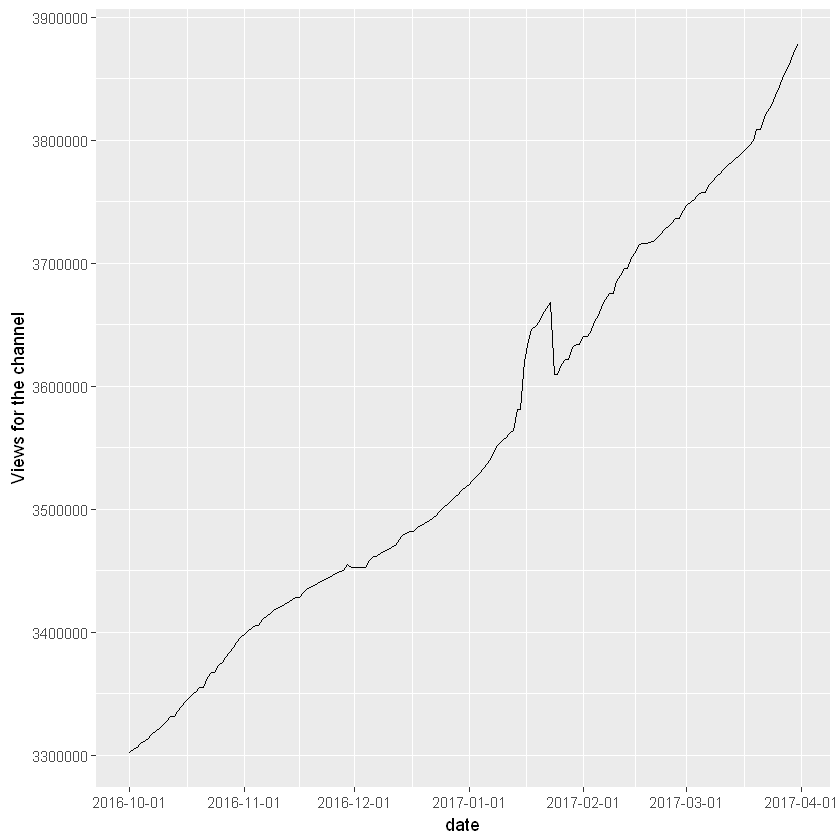

In [5]:
#Plot views vs dates

ggplot(chid.df, aes(date, views)) + geom_line() + scale_x_date('date', date_breaks='1 month')  + ylab("Views for the channel") +
            xlab("")

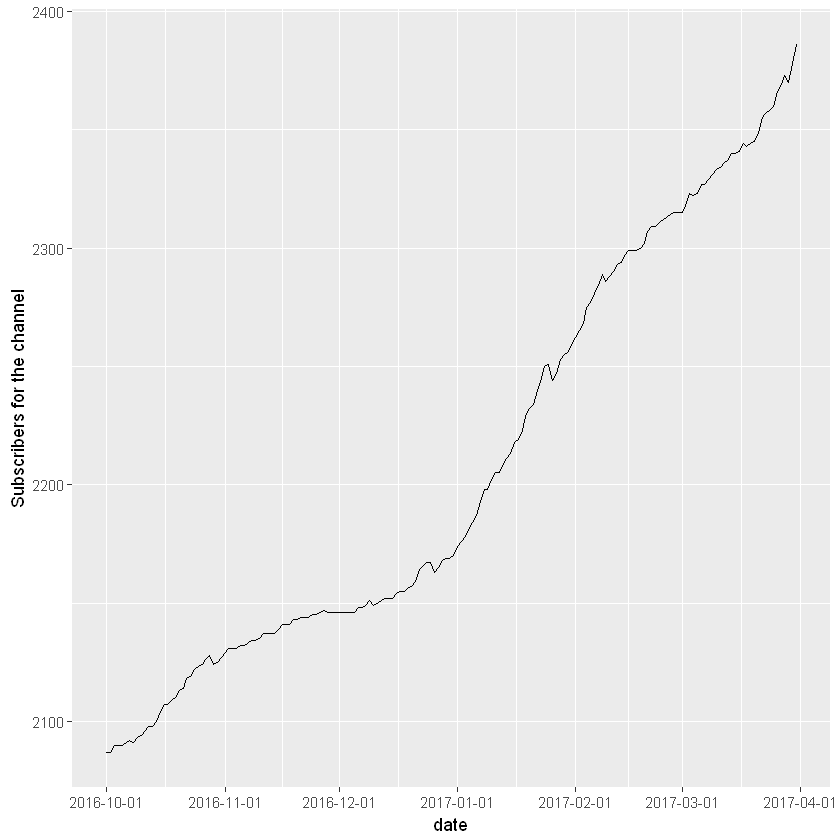

In [6]:
#Plot subscribers vs dates

ggplot(chid.df, aes(date, subscriber)) + geom_line() + scale_x_date('date', date_breaks='1 month') + ylab("Subscribers for the channel") + xlab("")

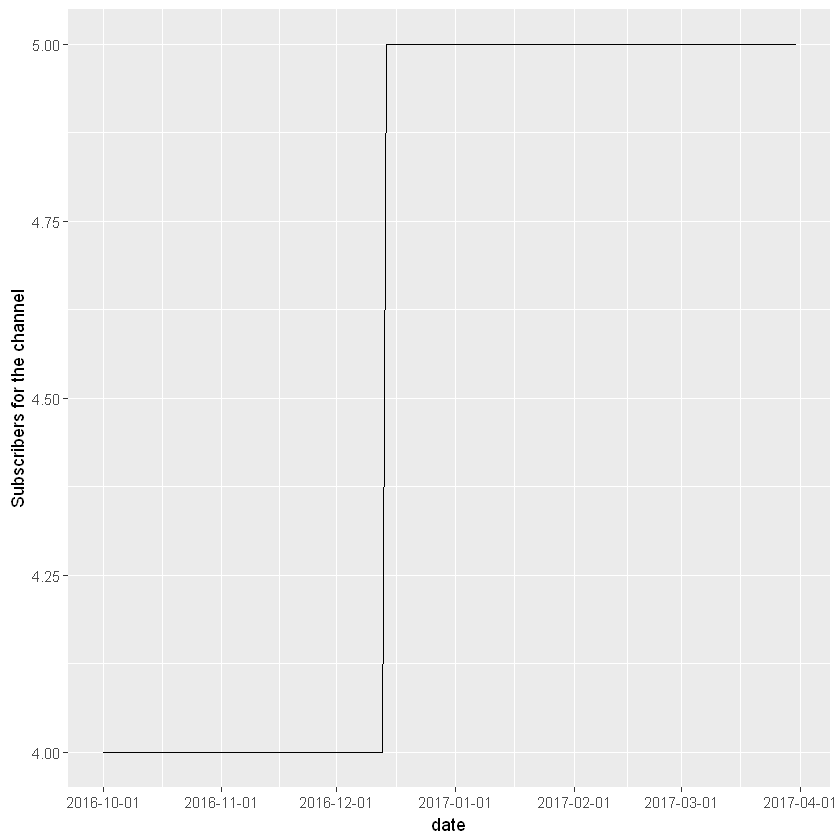

In [7]:
#Plot videoscounts vs dates

ggplot(chid.df, aes(date, videoscount)) + geom_line() + scale_x_date('date', date_breaks='1 month') + ylab("Subscribers for the channel") + xlab("")

We need to smoothen the observed data into a more stable predictable series. For that, calculate the moving average of the data points. It is the average of the data points across different time periods; i.e; weekly and monthly. We then select the one which gives best results. 

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."Warning message:
"Removed 30 rows containing missing values (geom_path)."

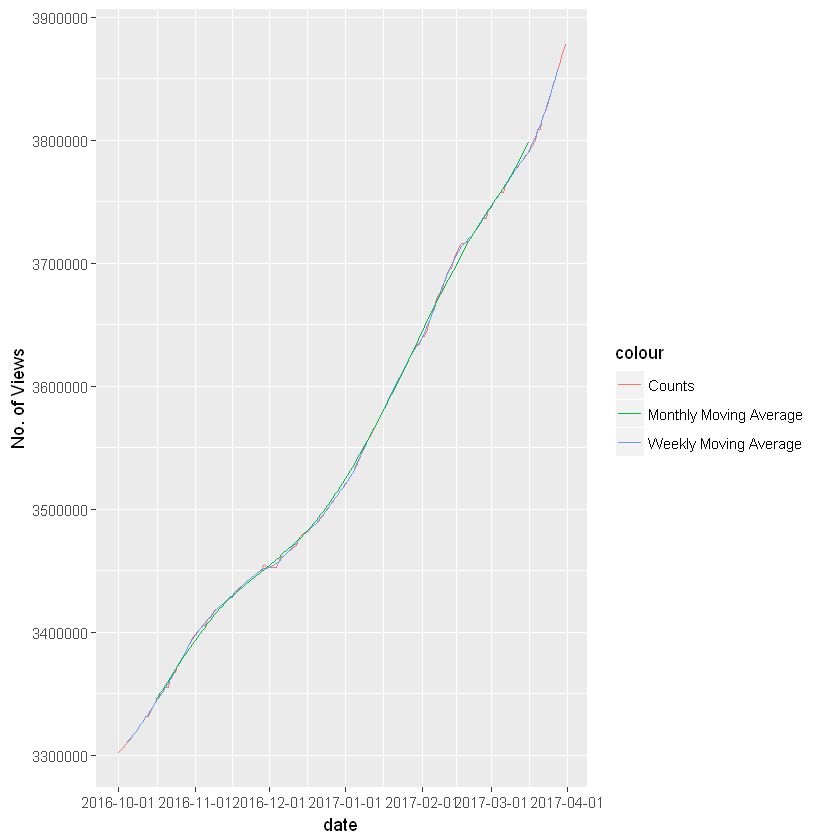

In [8]:
chid.df$views_ma7 = ma(chid.df$clean_views, order=7) # using the clean version with no outliers
chid.df$views_ma30 = ma(chid.df$clean_views, order=30)


ggplot() +
  geom_line(data = chid.df, aes(x = date, y = chid.df$clean_views, colour = "Counts")) +
  geom_line(data = chid.df, aes(x = date, y = views_ma7,   colour = "Weekly Moving Average"))  +
  geom_line(data = chid.df, aes(x = date, y = views_ma30, colour = "Monthly Moving Average"))  +
  scale_x_date('date', date_breaks='1 month')  +
  ylab('No. of Views')

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."Warning message:
"Removed 30 rows containing missing values (geom_path)."

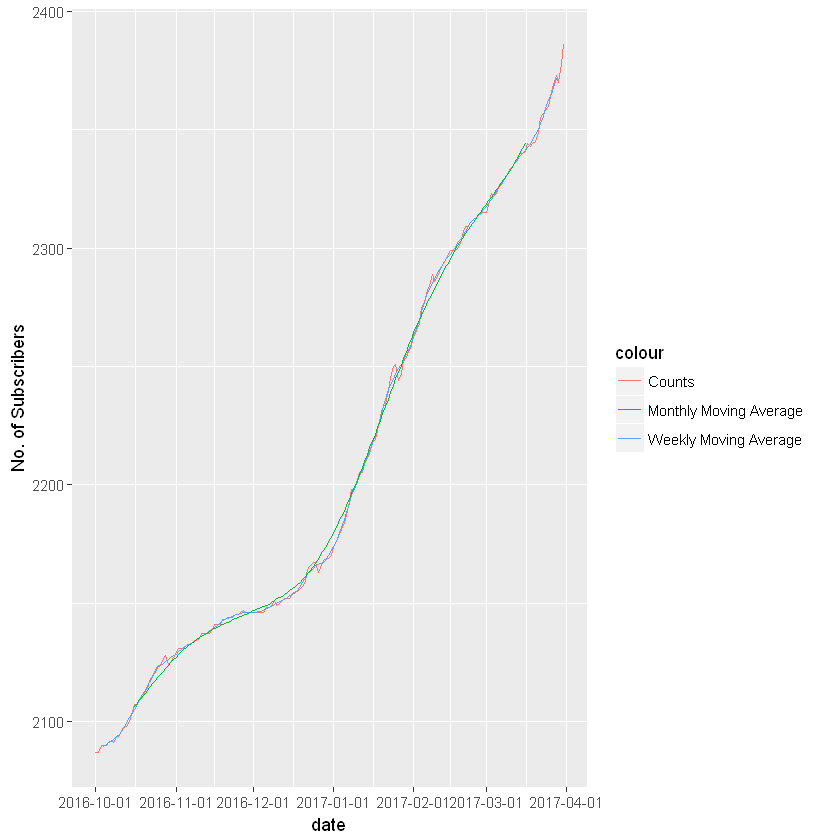

In [9]:
chid.df$subscribers_ma7 = ma(chid.df$clean_subscribers, order=7) # using the clean version with no outliers
chid.df$subscribers_ma30 = ma(chid.df$clean_subscribers, order=30)


ggplot() +
  geom_line(data = chid.df, aes(x = date, y = chid.df$clean_subscribers, colour = "Counts")) +
  geom_line(data = chid.df, aes(x = date, y = subscribers_ma7,   colour = "Weekly Moving Average"))  +
  geom_line(data = chid.df, aes(x = date, y = subscribers_ma30, colour = "Monthly Moving Average"))  +
  scale_x_date('date', date_breaks='1 month')  +
  ylab('No. of Subscribers')

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
"Removed 6 rows containing missing values (geom_path)."Warning message:
"Removed 30 rows containing missing values (geom_path)."

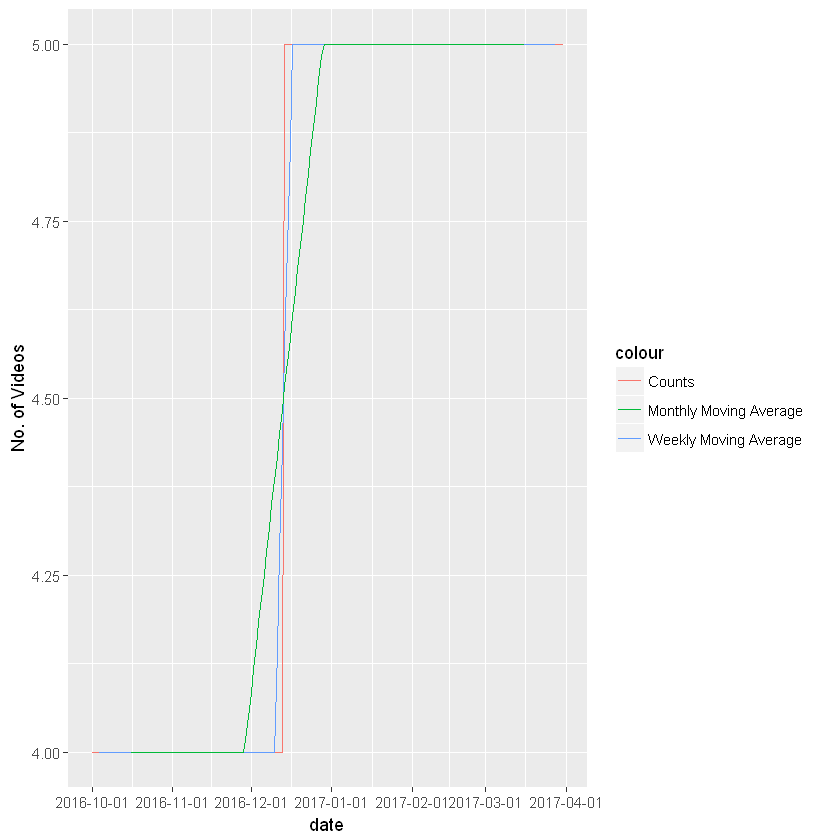

In [10]:
chid.df$videoscount_ma7 = ma(chid.df$clean_videoscount, order=7) # using the clean version with no outliers
chid.df$videoscount_ma30 = ma(chid.df$clean_videoscount, order=30)


ggplot() +
  geom_line(data = chid.df, aes(x = date, y = chid.df$clean_videoscount, colour = "Counts")) +
  geom_line(data = chid.df, aes(x = date, y = videoscount_ma7,   colour = "Weekly Moving Average"))  +
  geom_line(data = chid.df, aes(x = date, y = videoscount_ma30, colour = "Monthly Moving Average"))  +
  scale_x_date('date', date_breaks='1 month')  +
  ylab('No. of Videos')

We selected moving average with weekly period.

We are using auto.arima() function first.

In [11]:
views_ma = ts(na.omit(chid.df$views_ma7))
#print(views_ma)
subscribers_ma = ts(na.omit(chid.df$subscribers_ma7))
#print(subscribers_ma) 
videoscount_ma = ts(na.omit(chid.df$videoscount_ma7))
#print(videoscount_ma)

We will be using the arima model for forecasting. Data points 1 to 145 will be used for training and remaining data points will be used for testing how well our model is doing.

# Views

Series: views_ma[-c(146:176)] 
ARIMA(0,2,0)                    

sigma^2 estimated as 265482:  log likelihood=-1034.6
AIC=2071.21   AICc=2071.24   BIC=2074.17


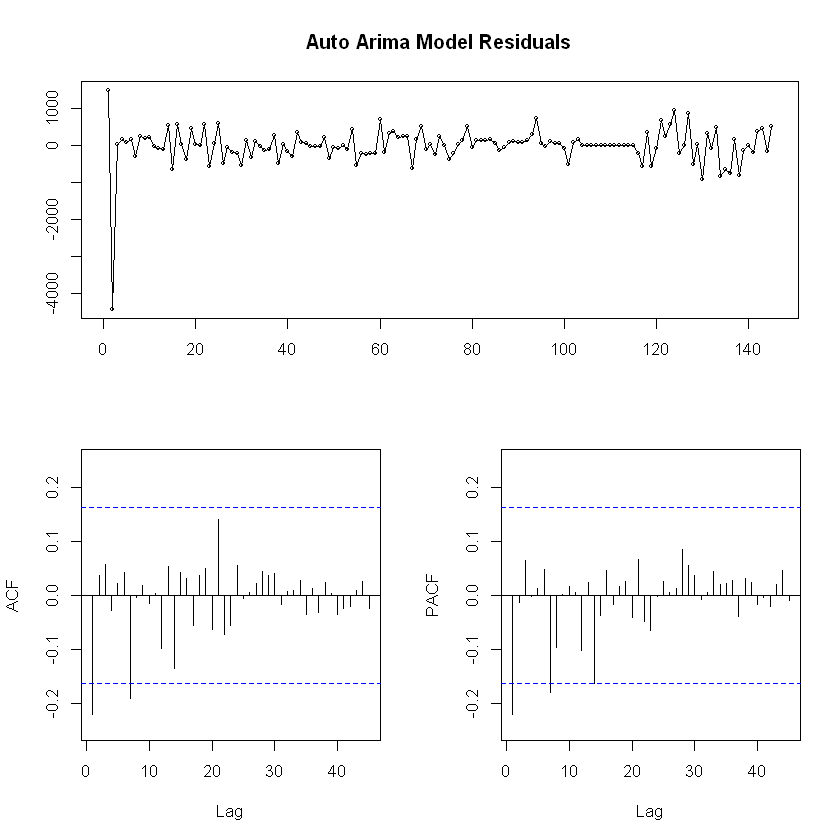

Time Series:
Start = 1 
End = 145 
Frequency = 1 
  [1] 3307686 3315989 3313942 3316391 3319140 3321868 3324843 3327029 3330010
 [10] 3333128 3336499 3339577 3342540 3345344 3349347 3351480 3355382 3358763
 [19] 3361350 3365237 3368727 3372191 3376785 3379657 3383207 3387869 3390956
 [28] 3394409 3397553 3400454 3402494 3405307 3407360 3409954 3412378 3414552
 [37] 3416644 3419389 3420877 3422908 3424559 3425791 3428016 3430031 3432064
 [46] 3433976 3435868 3437702 3440022 3441431 3443083 3444606 3446217 3447617
 [55] 3449959 3450780 3451718 3452360 3452808 3453028 3454885 3455655 3457278
 [64] 3459335 3461421 3463788 3466412 3467557 3469625 3472532 3474716 3477046
 [73] 3478873 3481433 3483763 3485300 3486773 3488510 3490467 3493342 3495565
 [82] 3498132 3500828 3503664 3506665 3509631 3512245 3514869 3517688 3520638
 [91] 3523630 3526701 3529950 3533668 3538544 3542768 3546896 3551246 3555614
[100] 3560018 3564178 3567402 3571315 3575480 3579477 3583473 3587469 3591465
[109] 3595462 

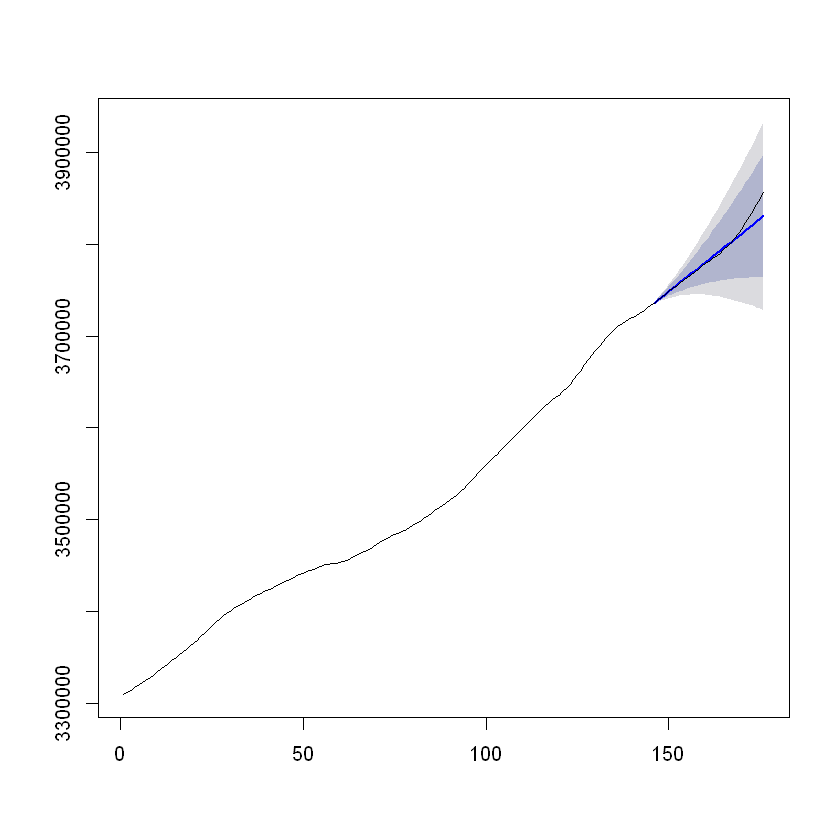

In [12]:
auto.fit.views = auto.arima(views_ma[-c(146:176)], seasonal = TRUE)
print(auto.fit.views)
tsdisplay(residuals(auto.fit.views), lag.max=45, main='Auto Arima Model Residuals')
fc.val.views = forecast(auto.fit.views,h=31)
plot(fc.val.views, main=" ")
lines(views_ma)
print(fc.val.views$fitted)

We see that there are significant spikes in ACF and PACF at lags 1 and 7.
We check with d=1; d=2 and check aic values with p=7,q=0; p=0,q=7 and also p=7, q=7


Call:
arima(x = views_ma[-c(146:176)], order = c(7, 2, 0), method = "ML")

Coefficients:
          ar1     ar2     ar3     ar4      ar5     ar6      ar7
      -0.0163  0.1241  0.1260  0.0026  -0.0178  0.1411  -0.3940
s.e.   0.0764  0.0752  0.0759  0.0771   0.0765  0.0756   0.0764

sigma^2 estimated as 85823:  log likelihood = -1015.92,  aic = 2047.84


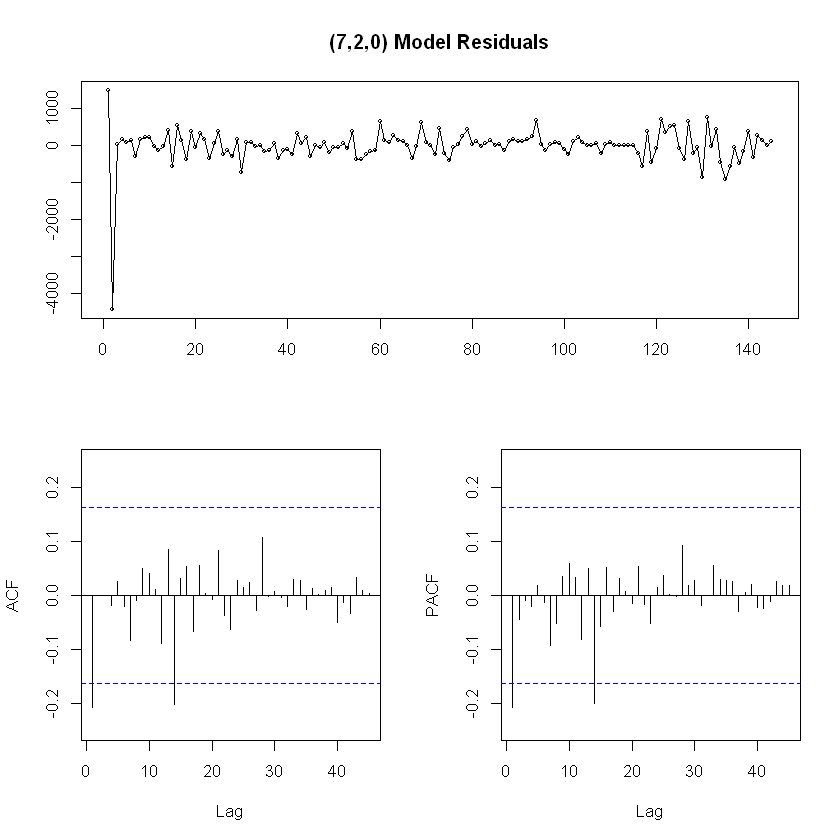

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
146        3736293 3735917 3736668 3735718 3736867
147        3739555 3738721 3740389 3738280 3740831
148        3743013 3741584 3744442 3740827 3745199
149        3746396 3744234 3748558 3743089 3749703
150        3749598 3746591 3752605 3744999 3754197
151        3752953 3749003 3756903 3746912 3758994
152        3756084 3751067 3761101 3748412 3763756
153        3759181 3753078 3765283 3749848 3768513
154        3762293 3755064 3769522 3751237 3773349
155        3765289 3756902 3773676 3752462 3778116
156        3768285 3758721 3777850 3753658 3782913
157        3771366 3760601 3782130 3754903 3787828
158        3774339 3762349 3786329 3756002 3792676
159        3777407 3764184 3790630 3757184 3797630
160        3780489 3765996 3794982 3758324 3802654
161        3783546 3767755 3799338 3759395 3807697
162        3786662 3769540 3803784 3760476 3812848
163        3789789 3771299 3808280 3761511 3818068
164        3792871 3772974 3812

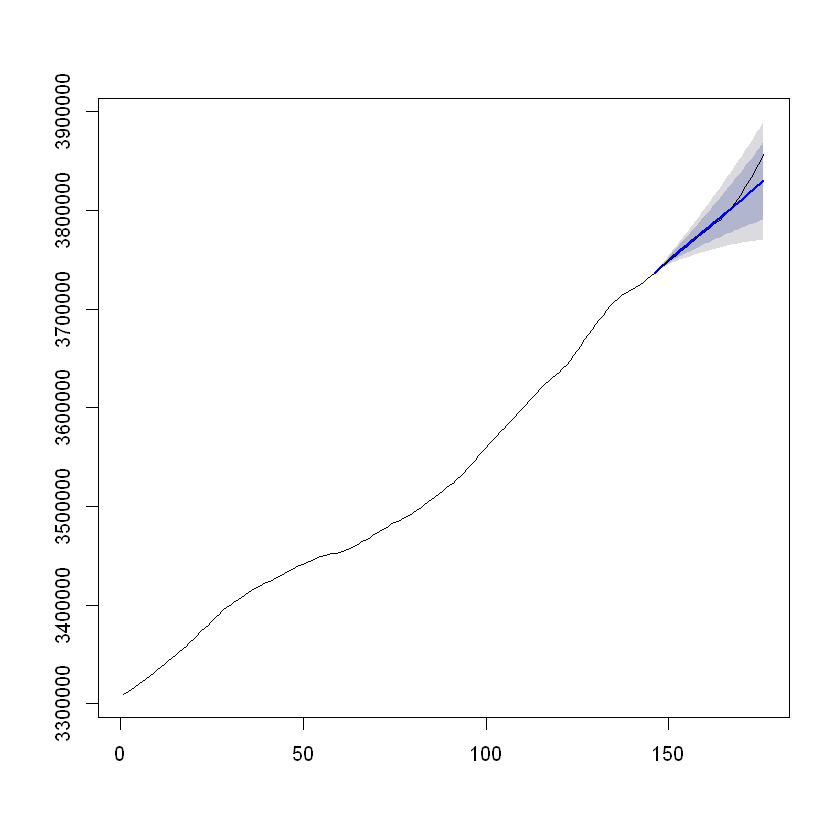

In [13]:
fitp7.views = arima(views_ma[-c(146:176)], order=c(7,2,0), method="ML")
print(fitp7.views)
tsdisplay(residuals(fitp7.views), lag.max=45, main='(7,2,0) Model Residuals')
fcp7.val.views = forecast(fitp7.views,h=31)
plot(fcp7.val.views, main=" ")
lines(views_ma)
print(fcp7.val.views)


Call:
arima(x = views_ma[-c(146:176)], order = c(0, 2, 7), method = "ML")

Coefficients:
         ma1     ma2     ma3     ma4      ma5    ma6      ma7
      0.0653  0.1110  0.1896  0.1942  -0.0037  0.158  -0.7737
s.e.  0.0728  0.0656  0.0800  0.0674   0.0808  0.066   0.0837

sigma^2 estimated as 62277:  log likelihood = -999.13,  aic = 2014.26


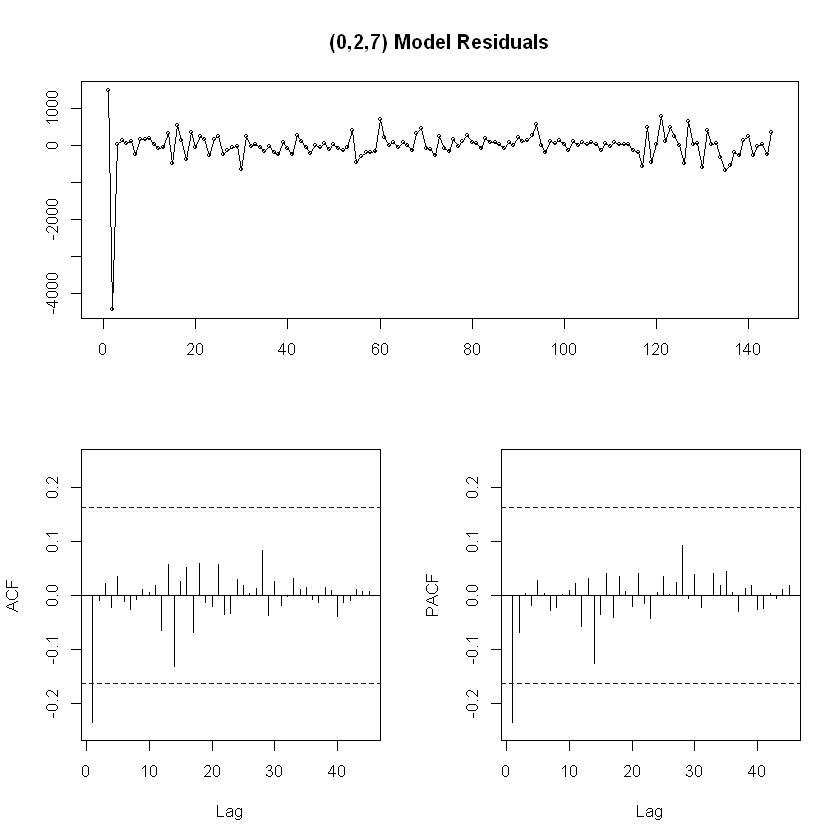

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
146        3736137 3735813 3736461 3735641 3736633
147        3739013 3738270 3739756 3737877 3740149
148        3742113 3740828 3743399 3740147 3744080
149        3745311 3743344 3747277 3742303 3748318
150        3748450 3745657 3751243 3744178 3752722
151        3751836 3748101 3755572 3746124 3757549
152        3754952 3750146 3759759 3747601 3762303
153        3758068 3752224 3763913 3749129 3767007
154        3761184 3754306 3768063 3750665 3771704
155        3764300 3756380 3772221 3752187 3776414
156        3767417 3758438 3776395 3753685 3781148
157        3770533 3760476 3780589 3755153 3785912
158        3773649 3762493 3784805 3756587 3790710
159        3776765 3764485 3789044 3757985 3795544
160        3779881 3766454 3793308 3759346 3800415
161        3782997 3768397 3797596 3760669 3805325
162        3786113 3770316 3801910 3761953 3810272
163        3789229 3772209 3806248 3763200 3815258
164        3792345 3774078 3810

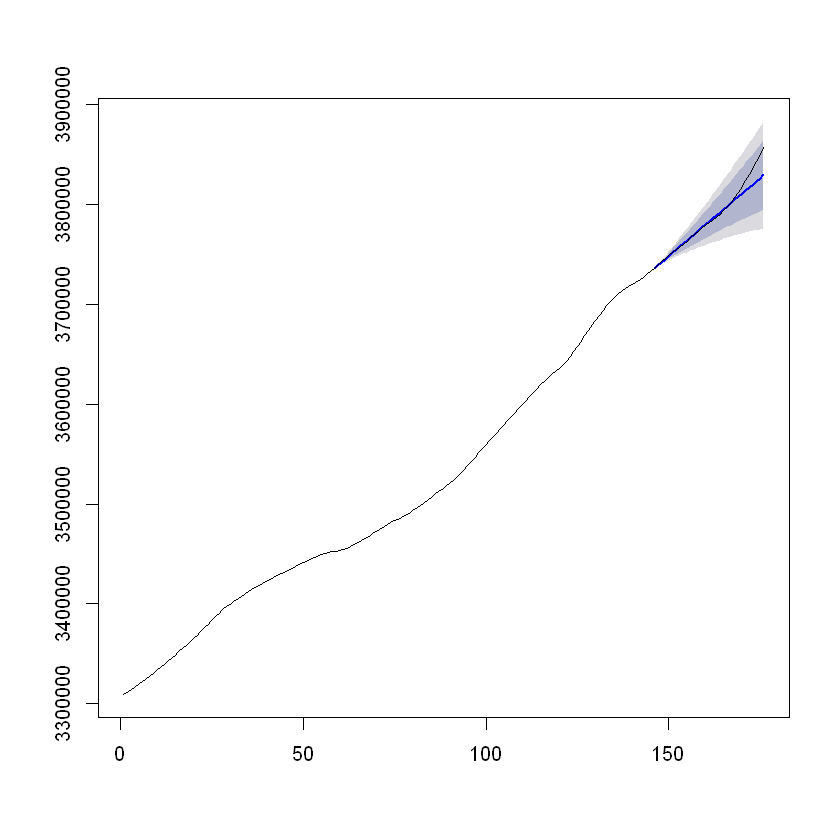

In [14]:
fitq7.views = arima(views_ma[-c(146:176)], order=c(0,2,7), method="ML")
print(fitq7.views)
tsdisplay(residuals(fitq7.views), lag.max=45, main='(0,2,7) Model Residuals')
fcq7.val.views = forecast(fitq7.views,h=31)
plot(fcq7.val.views, main=" ")
lines(views_ma)
print(fcq7.val.views)                                                           


Call:
arima(x = views_ma[-c(146:176)], order = c(7, 2, 7), method = "ML")

Coefficients:
         ar1     ar2     ar3      ar4     ar5     ar6     ar7     ma1      ma2
      0.0115  0.1917  0.2168  -0.0162  0.0227  0.2129  0.0603  0.0020  -0.0552
s.e.  0.1061  0.1156  0.1030   0.1149  0.1044  0.1076  0.0982  0.0897   0.1063
         ma3     ma4      ma5      ma6      ma7
      0.0242  0.1315  -0.1258  -0.0354  -0.8768
s.e.  0.0795  0.0988   0.0914   0.0998   0.0969

sigma^2 estimated as 59719:  log likelihood = -996.54,  aic = 2023.08


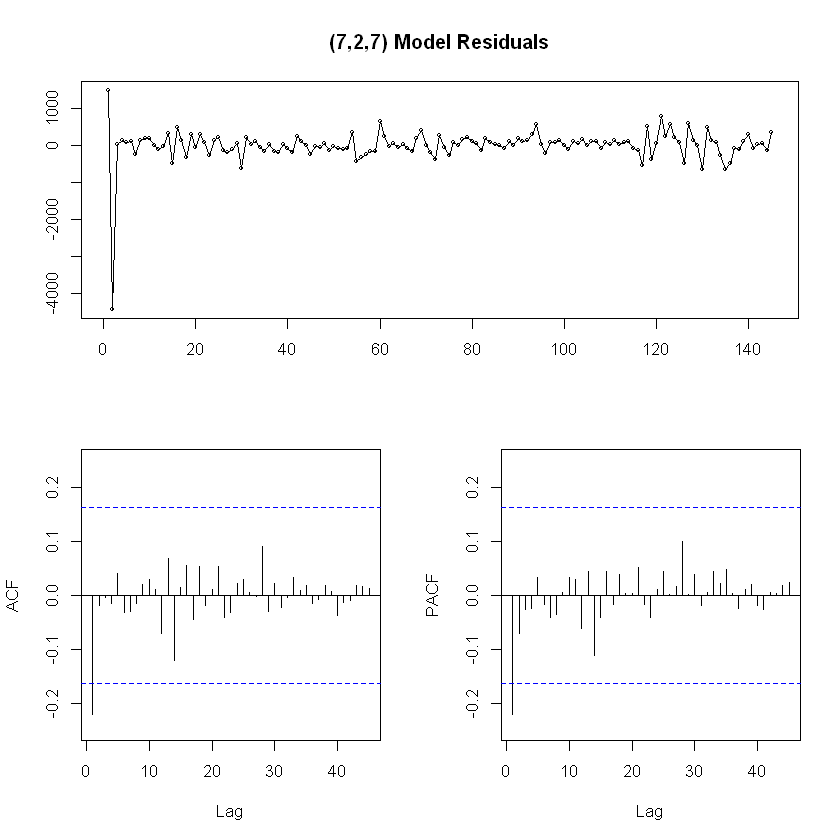

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
146        3736186 3735869 3736504 3735701 3736672
147        3739081 3738368 3739794 3737991 3740172
148        3742212 3740981 3743444 3740328 3744096
149        3745434 3743536 3747331 3742531 3748336
150        3748583 3745880 3751286 3744448 3752717
151        3752002 3748386 3755617 3746472 3757531
152        3755139 3750469 3759809 3747997 3762281
153        3758259 3752559 3763958 3749542 3766975
154        3761421 3754678 3768163 3751109 3771732
155        3764546 3756743 3772349 3752613 3776479
156        3767676 3758808 3776544 3754113 3781239
157        3770856 3760905 3780806 3755638 3786073
158        3773984 3762931 3785036 3757080 3790887
159        3777103 3764948 3789258 3758513 3795692
160        3780229 3766970 3793488 3759951 3800507
161        3783337 3768973 3797701 3761369 3805305
162        3786445 3770980 3801910 3762793 3810097
163        3789561 3772996 3806125 3764227 3814894
164        3792664 3775002 3810

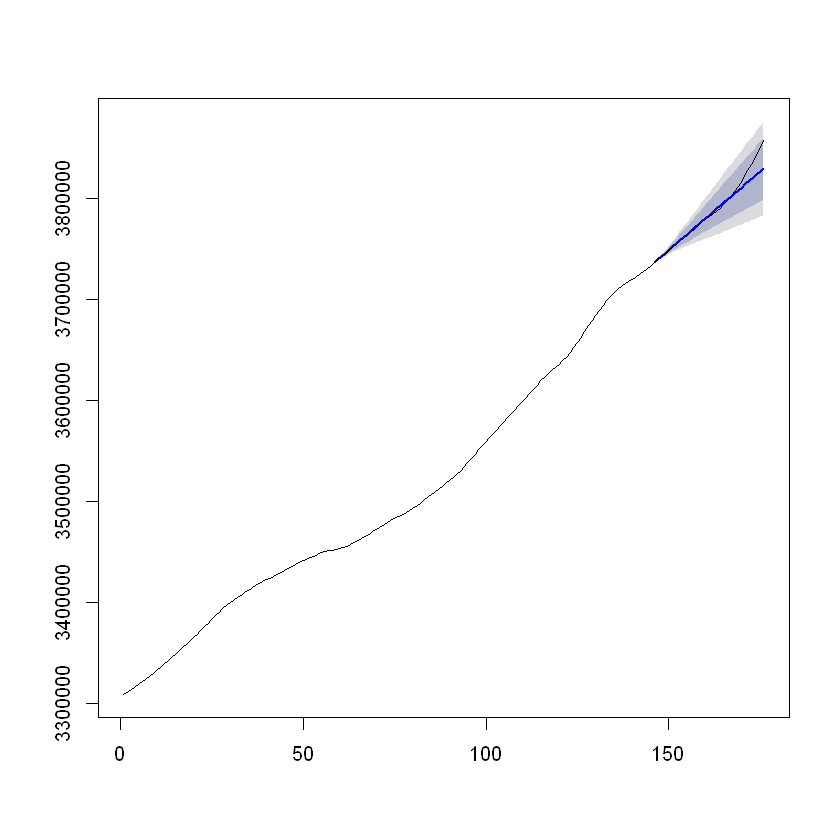

In [15]:
fitpq7.views = arima(views_ma[-c(146:176)], order=c(7,2,7), method="ML")
print(fitpq7.views)
tsdisplay(residuals(fitpq7.views), lag.max=45, main='(7,2,7) Model Residuals')
fcpq7.val.views = forecast(fitpq7.views,h=31)
plot(fcpq7.val.views, main=" ")
lines(views_ma)
print(fcpq7.val.views)



Call:
arima(x = views_ma[-c(146:176)], order = c(7, 1, 7), method = "ML", optim.control = list(maxit = 1000))

Coefficients:
         ar1     ar2     ar3      ar4     ar5     ar6      ar7     ma1     ma2
      0.9365  0.1633  0.0381  -0.2039  0.0363  0.1750  -0.1477  0.0851  0.0394
s.e.  0.1752  0.1464  0.1471   0.1456  0.1428  0.1321   0.1342  0.1592  0.1737
         ma3     ma4      ma5     ma6      ma7
      0.1169  0.2177  -0.0298  0.0621  -0.7901
s.e.  0.1386  0.1475   0.1812  0.1634   0.1384

sigma^2 estimated as 60001:  log likelihood = -1006.02,  aic = 2042.03


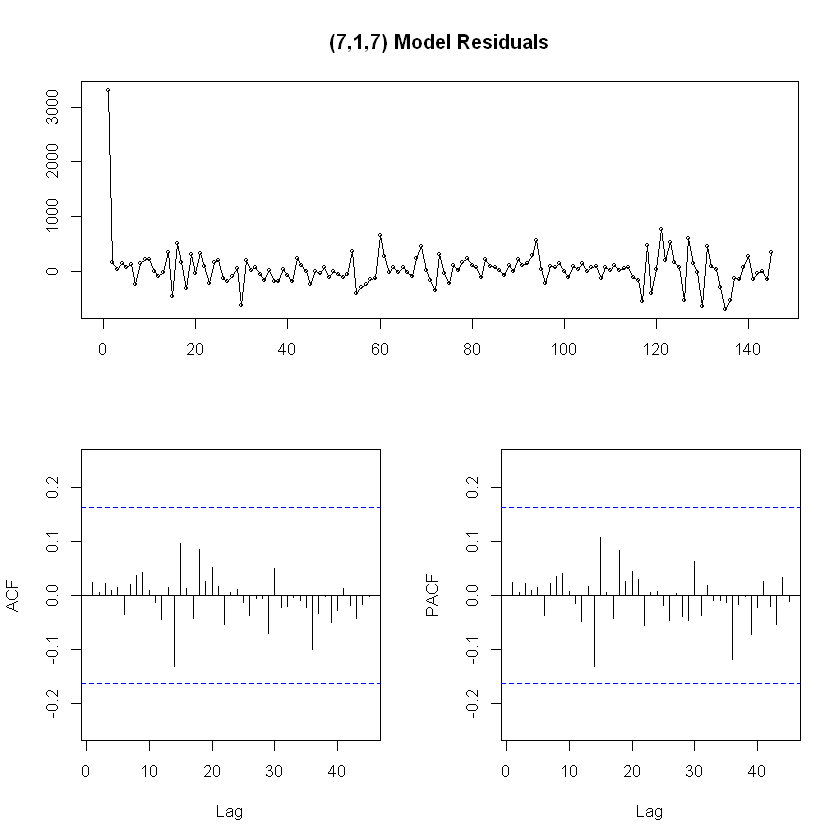

    Point Forecast   Lo 80   Hi 80   Lo 95   Hi 95
146        3736183 3735865 3736501 3735696 3736669
147        3739068 3738351 3739784 3737972 3740163
148        3742205 3740966 3743444 3740310 3744100
149        3745430 3743519 3747340 3742508 3748352
150        3748581 3745857 3751305 3744416 3752747
151        3752008 3748364 3755652 3746434 3757581
152        3755136 3750430 3759842 3747938 3762333
153        3758243 3752504 3763981 3749466 3767019
154        3761391 3754610 3768172 3751020 3771762
155        3764484 3756643 3772324 3752493 3776474
156        3767574 3758667 3776481 3753952 3781197
157        3770708 3760713 3780703 3755422 3785994
158        3773778 3762667 3784889 3756785 3790771
159        3776849 3764610 3789087 3758131 3795566
160        3779920 3766535 3793304 3759449 3800390
161        3782963 3768414 3797512 3760713 3805214
162        3786005 3770277 3801733 3761951 3810059
163        3789045 3772119 3805971 3763159 3814930
164        3792065 3773923 3810

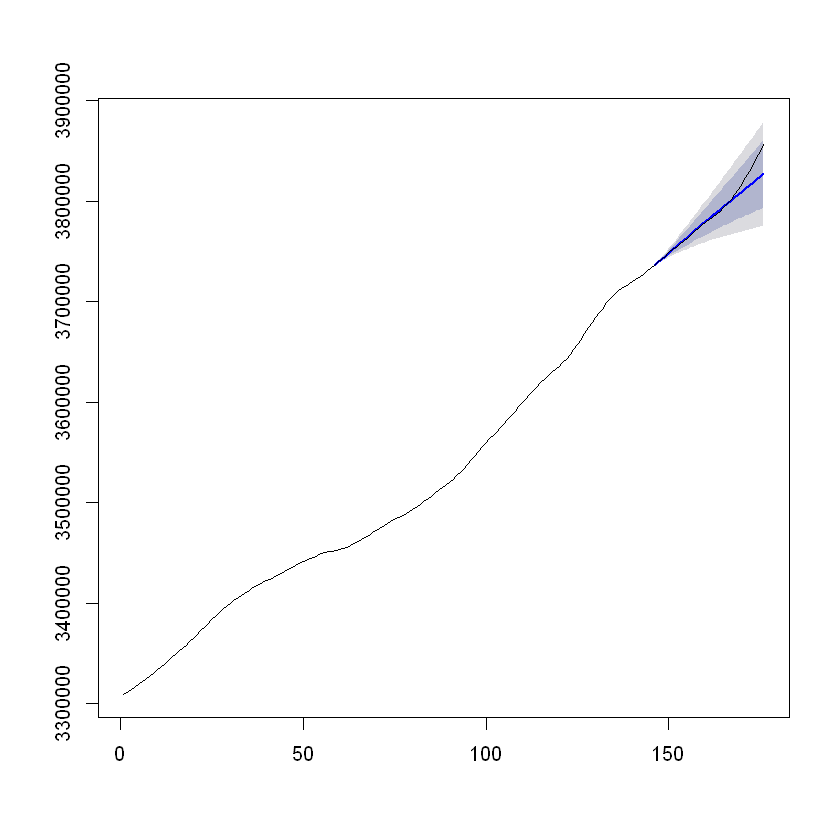

In [16]:
fitpq7.views = arima(views_ma[-c(146:176)], order=c(7,1,7), optim.control = list(maxit = 1000), method="ML")
print(fitpq7.views)
tsdisplay(residuals(fitpq7.views), lag.max=45, main='(7,1,7) Model Residuals')
fcpq7.val.views = forecast(fitpq7.views,h=31)
plot(fcpq7.val.views, main=" ")
lines(views_ma)
print(fcpq7.val.views)


Let's calculate accuracy for these.

In [17]:
acc.val.views = accuracy(fc.val.views, chid.df$views[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.views)

                      ME       RMSE      MAE           MPE        MAPE
Training set   -14.99231   511.6834  279.326 -0.0004499826 0.008010132
Test set     -9104.69585 10008.4964 9480.475 -0.2416703371 0.251465360
                   MASE       ACF1
Training set 0.09489335 -0.2215335
Test set     3.22073118         NA


In [18]:
acc.val.views = accuracy(fcp7.val.views, chid.df$views[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.views)

                      ME       RMSE       MAE           MPE        MAPE
Training set   -15.46451   485.1326  250.4901 -0.0004630152 0.007188157
Test set     -8980.82142 10026.4011 9507.1416 -0.2385123798 0.252235185
                   MASE       ACF1
Training set 0.08509714 -0.2075993
Test set     3.22979053         NA


In [19]:
acc.val.views = accuracy(fcq7.val.views, chid.df$views[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.views)

                      ME      RMSE       MAE           MPE        MAPE
Training set   -15.37489  460.5788  219.3048 -0.0004617389 0.006309168
Test set     -8314.83517 9385.3264 8903.1834 -0.2208292650 0.236171629
                   MASE       ACF1
Training set 0.07450279 -0.2354358
Test set     3.02461231         NA


In [20]:
acc.val.views = accuracy(fcpq7.val.views, chid.df$views[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.views)

                     ME      RMSE       MAE          MPE        MAPE       MASE
Training set    39.5499  367.5561  199.8332  0.001176568 0.005724518 0.06788786
Test set     -7911.7084 9294.7934 8866.4075 -0.210283360 0.235190764 3.01211871
                   ACF1
Training set 0.02269574
Test set             NA


ARIMA(7,1,7) gave the least value of RMSE and MASE values. Also, in the ACF and PACF plots of it's residuals, there were no significant spikes. We will use this model to forecast our views for next 3 months.


Call:
arima(x = chid.df$views, order = c(7, 1, 7), method = "ML")

Coefficients:
          ar1      ar2     ar3      ar4     ar5     ar6     ar7     ma1     ma2
      -0.1422  -0.9111  0.3428  -0.0141  0.8446  0.4129  0.4646  0.3017  1.0280
s.e.   0.2529   0.2827  0.1488   0.1647  0.2204  0.1776  0.2080  0.2509  0.3127
          ma3     ma4      ma5      ma6      ma7
      -0.3001  0.1494  -1.0782  -0.2587  -0.7190
s.e.   0.2030  0.1824   0.2316   0.2476   0.2285

sigma^2 estimated as 30310708:  log likelihood = -1818.25,  aic = 3666.5
Time Series:
Start = 183 
End = 273 
Frequency = 1 
 [1] 3882859 3884238 3888715 3892151 3895273 3899378 3902028 3905581 3909415
[10] 3912619 3916203 3919423 3922746 3926460 3929897 3933249 3936555 3939958
[19] 3943568 3947021 3950337 3953682 3957115 3960657 3964113 3967427 3970771
[28] 3974232 3977744 3981168 3984492 3987854 3991314 3994800 3998206 4001539
[37] 4004910 4008368 4011834 4015222 4018561 4021944 4025395 4028840 4032219
[46] 4035564 4038953

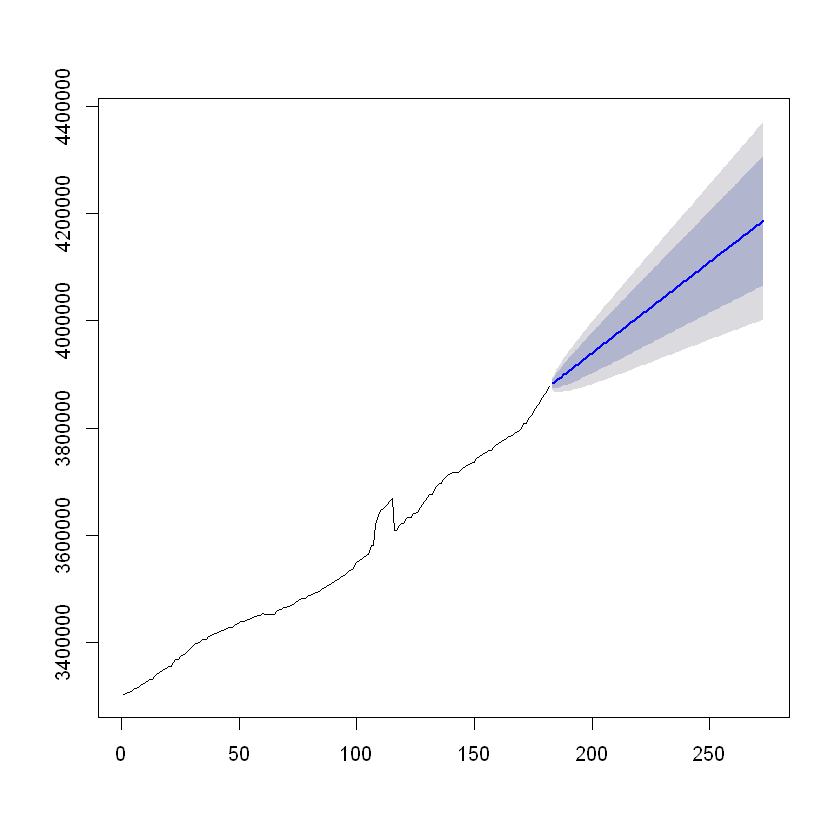

In [21]:
fitpq7.views.final = arima(chid.df$views, order=c(7,1,7), method="ML")
print(fitpq7.views.final)
fcpq7.views.final = forecast(fitpq7.views.final,h=91)
plot(fcpq7.views.final, main=" ")
lines(chid.df$views)
pred.views = round(fcpq7.views.final$mean)
print(pred.views)

# Subscribers

Series: subscribers_ma[-c(146:176)] 
ARIMA(2,2,2)                    

Coefficients:
          ar1      ar2     ma1     ma2
      -1.2796  -0.8515  1.4327  0.8782
s.e.   0.0691   0.0700  0.0835  0.0562

sigma^2 estimated as 0.1988:  log likelihood=-58.67
AIC=127.34   AICc=127.77   BIC=142.15


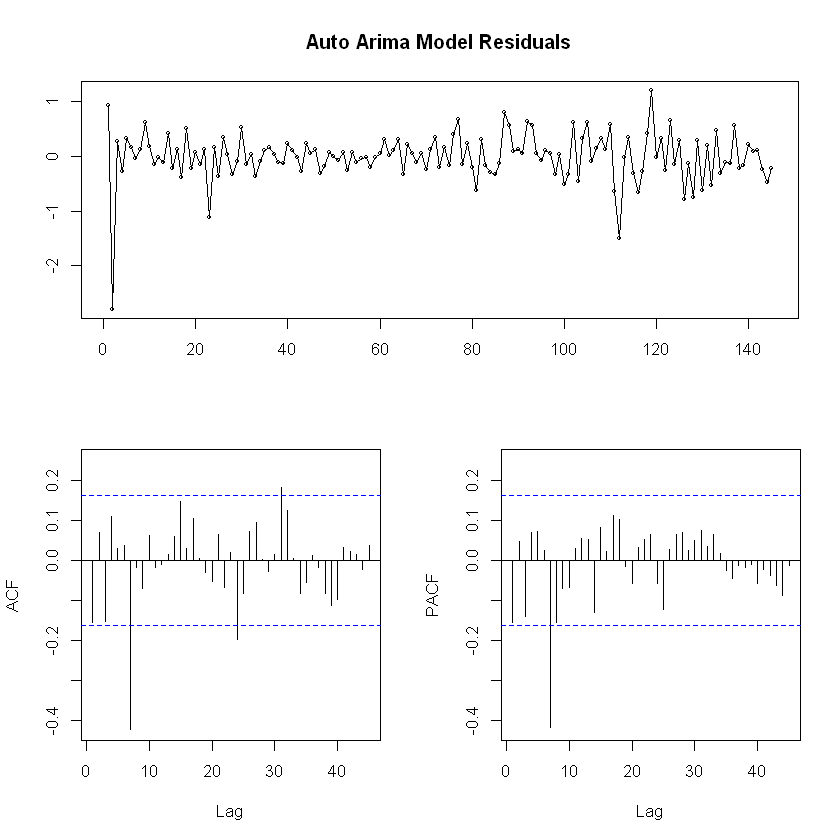

Time Series:
Start = 1 
End = 145 
Frequency = 1 
  [1] 2088.637 2092.945 2090.731 2091.857 2092.095 2093.412 2094.613 2095.591
  [9] 2096.953 2099.388 2101.570 2103.301 2105.118 2106.720 2109.362 2111.015
 [17] 2113.254 2114.484 2117.230 2118.938 2121.009 2122.735 2124.835 2124.414
 [25] 2125.646 2125.805 2127.106 2128.186 2128.376 2128.906 2130.570 2131.259
 [33] 2132.361 2132.525 2132.890 2133.705 2134.541 2135.402 2135.982 2136.331
 [41] 2137.460 2138.455 2139.285 2139.627 2140.671 2141.591 2142.745 2143.041
 [49] 2143.353 2144.007 2144.506 2144.923 2145.553 2145.500 2145.968 2146.047
 [57] 2146.161 2146.340 2146.028 2145.949 2145.987 2146.556 2146.898 2147.406
 [65] 2148.473 2148.491 2149.375 2150.110 2150.521 2151.240 2151.312 2151.935
 [73] 2153.199 2153.555 2154.604 2155.032 2156.478 2159.001 2160.341 2162.489
 [81] 2163.911 2164.126 2165.882 2166.721 2167.186 2167.410 2167.491 2169.584
 [89] 2171.915 2173.740 2175.957 2177.942 2181.291 2185.228 2188.503 2191.759
 [97] 2195.238

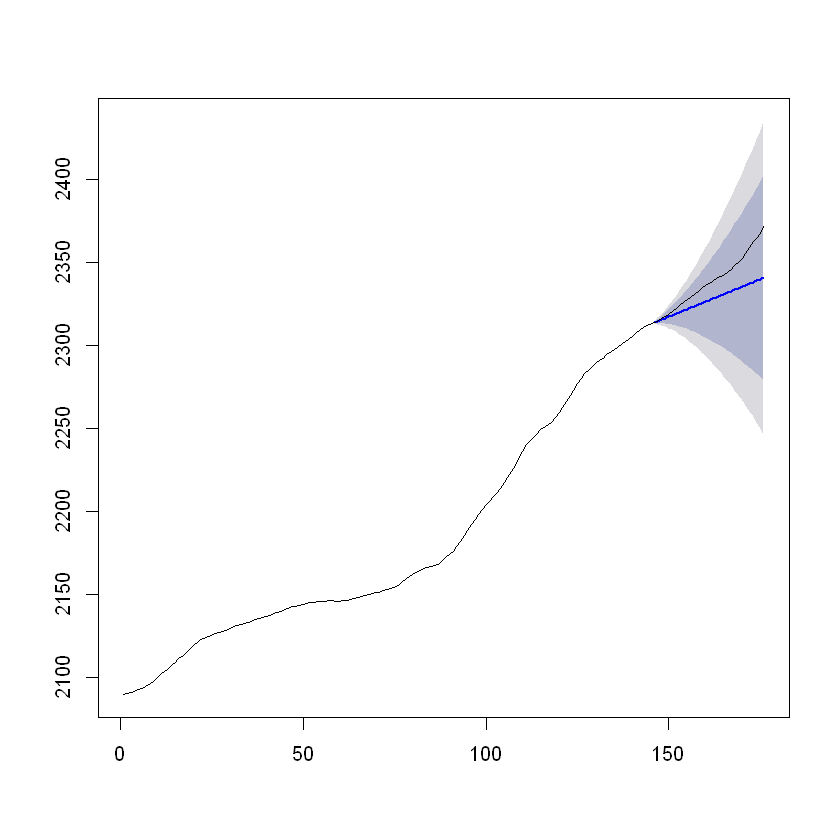

In [22]:
auto.fit.subscribers = auto.arima(subscribers_ma[-c(146:176)], seasonal = TRUE)
print(auto.fit.subscribers)
tsdisplay(residuals(auto.fit.subscribers), lag.max=45, main='Auto Arima Model Residuals')
fc.val.subscribers = forecast(auto.fit.subscribers,h=31)
plot(fc.val.subscribers, main=" ")
lines(subscribers_ma)
print(fc.val.subscribers$fitted)


Call:
arima(x = subscribers_ma[-c(146:176)], order = c(7, 2, 2), method = "ML")

Coefficients:
         ar1     ar2     ar3     ar4     ar5     ar6      ar7      ma1      ma2
      0.1031  0.0428  0.0542  0.0550  0.0095  0.1164  -0.6175  -0.0297  -0.1808
s.e.  0.0995  0.0866  0.0648  0.0645  0.0642  0.0640   0.0644   0.1256   0.0976

sigma^2 estimated as 0.08869:  log likelihood = -31.42,  aic = 82.83


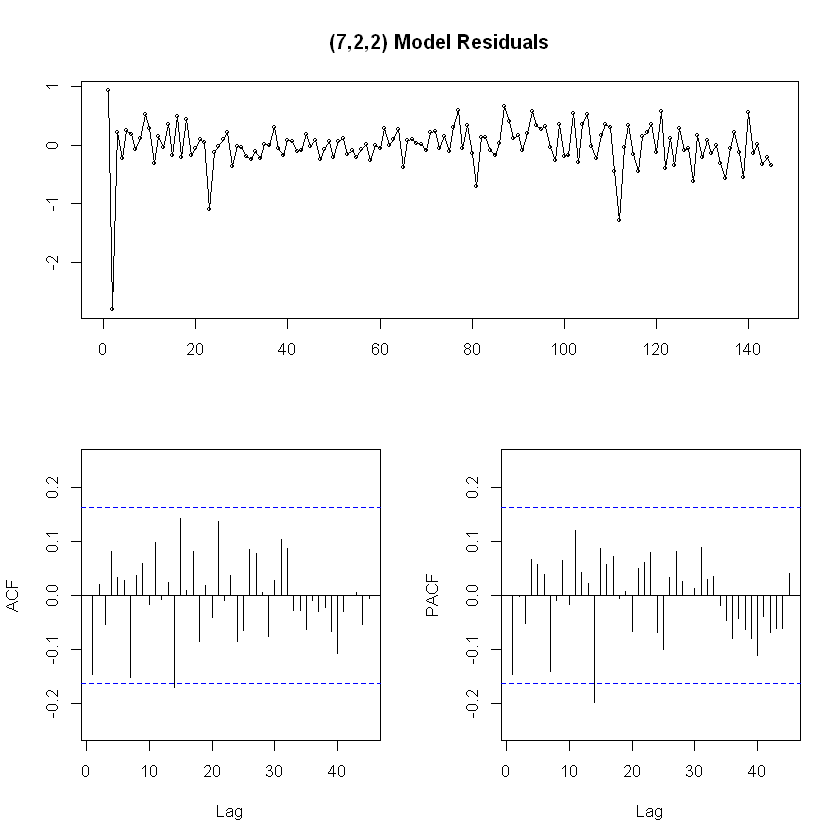

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146       2313.770 2313.388 2314.152 2313.186 2314.354
147       2314.699 2313.821 2315.578 2313.356 2316.043
148       2315.487 2314.039 2316.935 2313.272 2317.702
149       2316.228 2314.123 2318.333 2313.009 2319.448
150       2316.981 2314.128 2319.835 2312.617 2321.346
151       2318.041 2314.356 2321.725 2312.406 2323.676
152       2319.320 2314.705 2323.935 2312.262 2326.378
153       2320.494 2314.989 2326.000 2312.074 2328.915
154       2321.746 2315.387 2328.105 2312.021 2331.471
155       2323.112 2315.909 2330.315 2312.096 2334.128
156       2324.533 2316.495 2332.570 2312.240 2336.825
157       2325.992 2317.134 2334.851 2312.445 2339.540
158       2327.304 2317.636 2336.973 2312.518 2342.091
159       2328.465 2318.013 2338.917 2312.481 2344.449
160       2329.683 2318.423 2340.944 2312.462 2346.905
161       2330.862 2318.754 2342.970 2312.344 2349.379
162       2331.958 2318.970 2344.946 2312.095 2351.822
163       

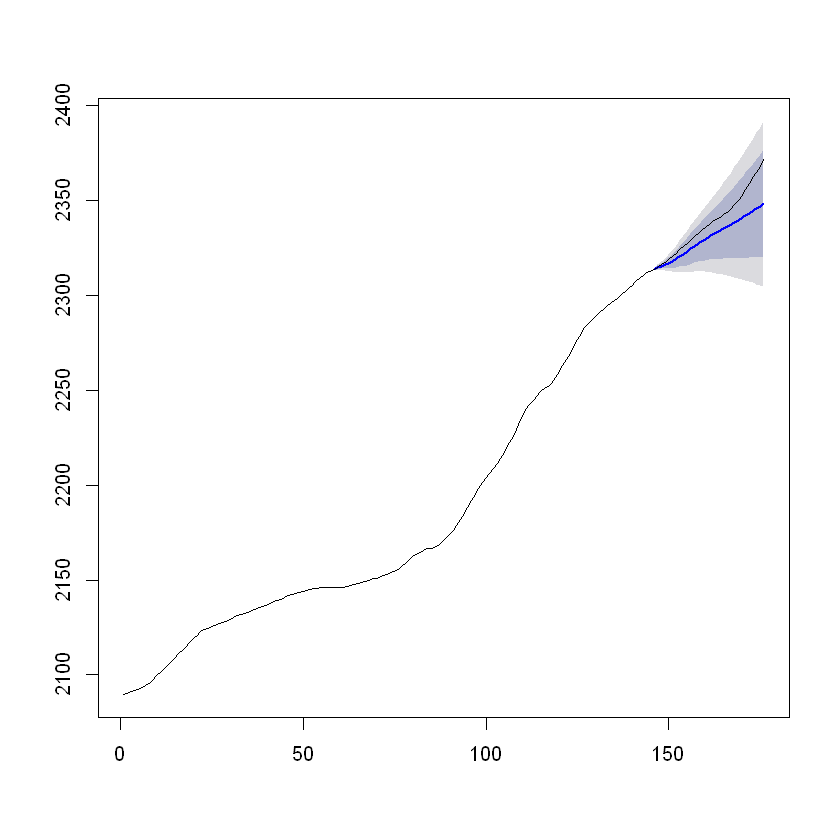

In [23]:
fitp7.subscribers = arima(subscribers_ma[-c(146:176)], order=c(7,2,2), method="ML")
print(fitp7.subscribers)
tsdisplay(residuals(fitp7.subscribers), lag.max=45, main='(7,2,2) Model Residuals')
fcp7.val.subscribers = forecast(fitp7.subscribers,h=31)
plot(fcp7.val.subscribers, main=" ")
lines(subscribers_ma)
print(fcp7.val.subscribers)


Call:
arima(x = subscribers_ma[-c(146:176)], order = c(0, 2, 7), method = "ML")

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6      ma7
      0.1382  0.0703  0.1326  0.0585  0.0999  0.0938  -0.8571
s.e.  0.0595  0.0706  0.0693  0.0761  0.0655  0.0668   0.0800

sigma^2 estimated as 0.07197:  log likelihood = -21.86,  aic = 59.72


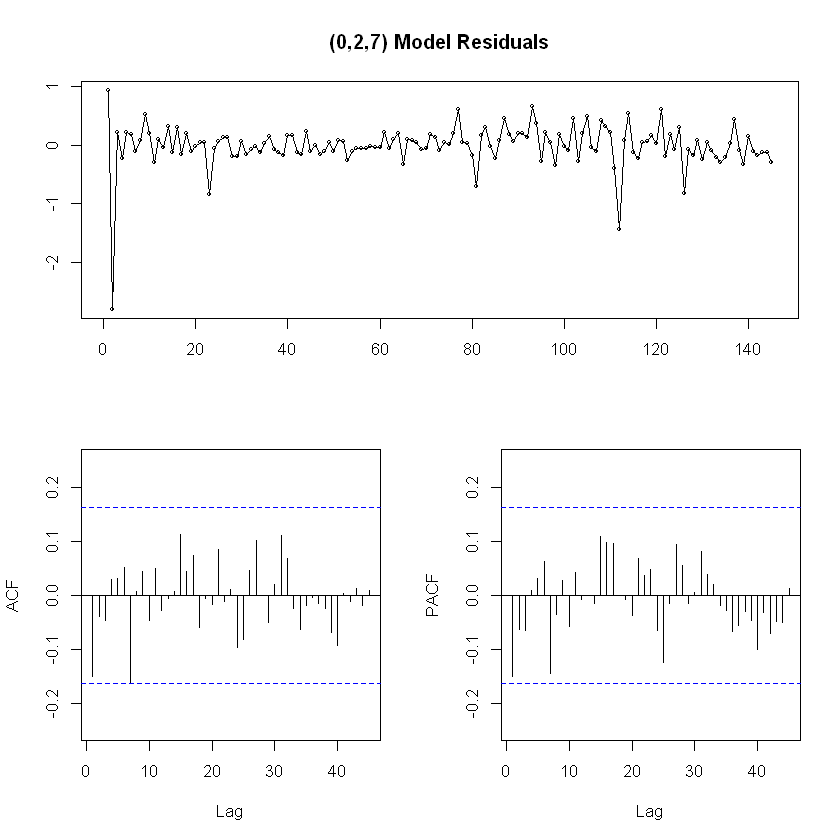

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146       2313.775 2313.428 2314.122 2313.245 2314.305
147       2314.642 2313.827 2315.457 2313.396 2315.888
148       2315.523 2314.110 2316.935 2313.362 2317.683
149       2316.509 2314.363 2318.654 2313.227 2319.790
150       2317.554 2314.555 2320.554 2312.967 2322.142
151       2318.684 2314.706 2322.661 2312.600 2324.767
152       2320.061 2314.983 2325.140 2312.294 2327.829
153       2321.439 2315.321 2327.557 2312.083 2330.796
154       2322.817 2315.686 2329.948 2311.911 2333.723
155       2324.194 2316.058 2332.331 2311.751 2336.638
156       2325.572 2316.429 2334.715 2311.590 2339.555
157       2326.950 2316.793 2337.106 2311.417 2342.483
158       2328.328 2317.146 2339.509 2311.227 2345.428
159       2329.705 2317.485 2341.925 2311.016 2348.394
160       2331.083 2317.809 2344.357 2310.783 2351.383
161       2332.461 2318.117 2346.804 2310.524 2354.397
162       2333.838 2318.408 2349.269 2310.239 2357.438
163       

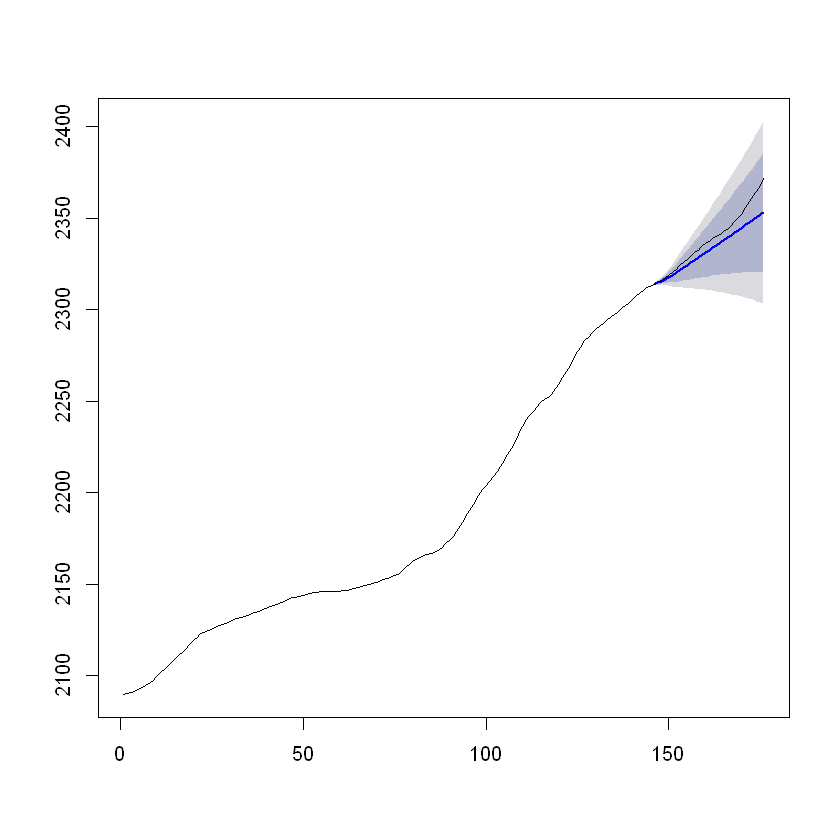

In [24]:
fitq7.subscribers = arima(subscribers_ma[-c(146:176)], order=c(0,2,7), method="ML")
print(fitq7.subscribers)
tsdisplay(residuals(fitq7.subscribers), lag.max=45, main='(0,2,7) Model Residuals')
fcq7.val.subscribers = forecast(fitq7.subscribers,h=31)
plot(fcq7.val.subscribers, main=" ")
lines(subscribers_ma)
print(fcq7.val.subscribers)                                                           


Call:
arima(x = subscribers_ma[-c(146:176)], order = c(7, 2, 7), method = "ML")

Coefficients:
          ar1      ar2      ar3     ar4      ar5     ar6      ar7     ma1
      -0.0169  -0.1984  -0.0307  0.0582  -0.0426  0.1564  -0.2216  0.2285
s.e.   0.1112   0.1080   0.1130  0.1115   0.1018  0.0969   0.0909  0.1100
         ma2     ma3     ma4     ma5     ma6      ma7
      0.1289  0.1824  0.0883  0.1101  0.1233  -0.7759
s.e.  0.1037  0.0991  0.1085  0.1014  0.1092   0.1058

sigma^2 estimated as 0.06495:  log likelihood = -14.78,  aic = 59.56


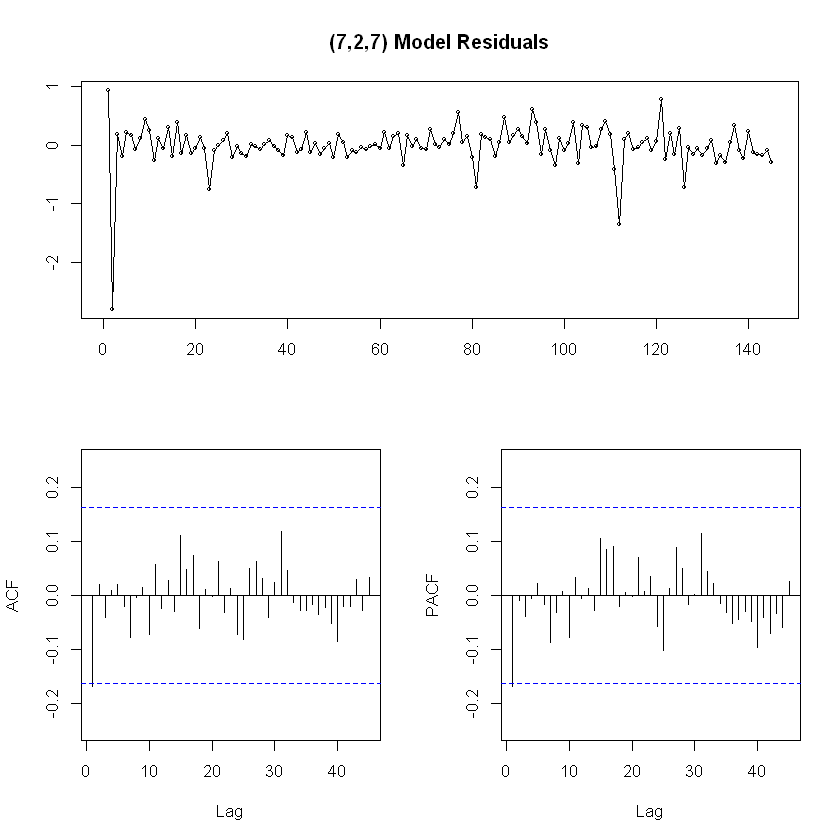

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146       2313.866 2313.537 2314.195 2313.363 2314.369
147       2314.757 2313.962 2315.552 2313.542 2315.972
148       2315.543 2314.190 2316.897 2313.473 2317.613
149       2316.422 2314.399 2318.446 2313.327 2319.517
150       2317.387 2314.569 2320.206 2313.077 2321.698
151       2318.426 2314.698 2322.153 2312.725 2324.127
152       2319.786 2315.007 2324.566 2312.477 2327.096
153       2321.028 2315.263 2326.793 2312.212 2329.845
154       2322.248 2315.540 2328.957 2311.989 2332.508
155       2323.521 2315.856 2331.186 2311.798 2335.244
156       2324.809 2316.162 2333.457 2311.584 2338.035
157       2326.059 2316.421 2335.697 2311.320 2340.799
158       2327.343 2316.698 2337.988 2311.063 2343.623
159       2328.547 2316.897 2340.197 2310.730 2346.364
160       2329.769 2317.087 2342.450 2310.374 2349.164
161       2331.015 2317.267 2344.763 2309.989 2352.041
162       2332.255 2317.415 2347.094 2309.559 2354.950
163       

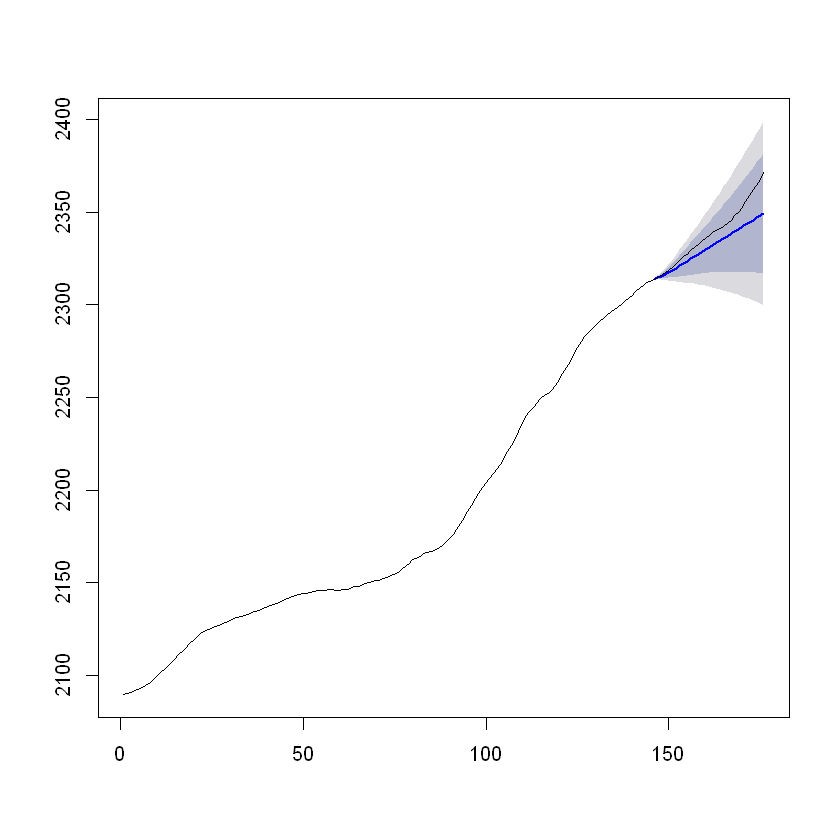

In [25]:
fitpq7.subscribers = arima(subscribers_ma[-c(146:176)], order=c(7,2,7), method="ML")
print(fitpq7.subscribers)
tsdisplay(residuals(fitpq7.subscribers), lag.max=45, main='(7,2,7) Model Residuals')
fcpq7.val.subscribers = forecast(fitpq7.subscribers,h=31)
plot(fcpq7.val.subscribers, main=" ")
lines(subscribers_ma)
print(fcpq7.val.subscribers)



Call:
arima(x = subscribers_ma[-c(146:176)], order = c(7, 1, 7), method = "ML", optim.control = list(maxit = 1000))

Coefficients:
          ar1     ar2     ar3     ar4     ar5     ar6      ar7     ma1     ma2
      -0.3166  0.0142  0.1404  0.3287  0.2502  0.3682  -0.0022  1.5660  1.5946
s.e.   0.2779  0.0960  0.0880  0.0890  0.1086  0.0981   0.1342  0.2755  0.3153
         ma3     ma4     ma5     ma6     ma7
      1.6127  1.5365  1.4381  1.3829  0.4457
s.e.  0.3212  0.3298  0.3044  0.2961  0.2594

sigma^2 estimated as 0.06642:  log likelihood = -18.36,  aic = 66.73


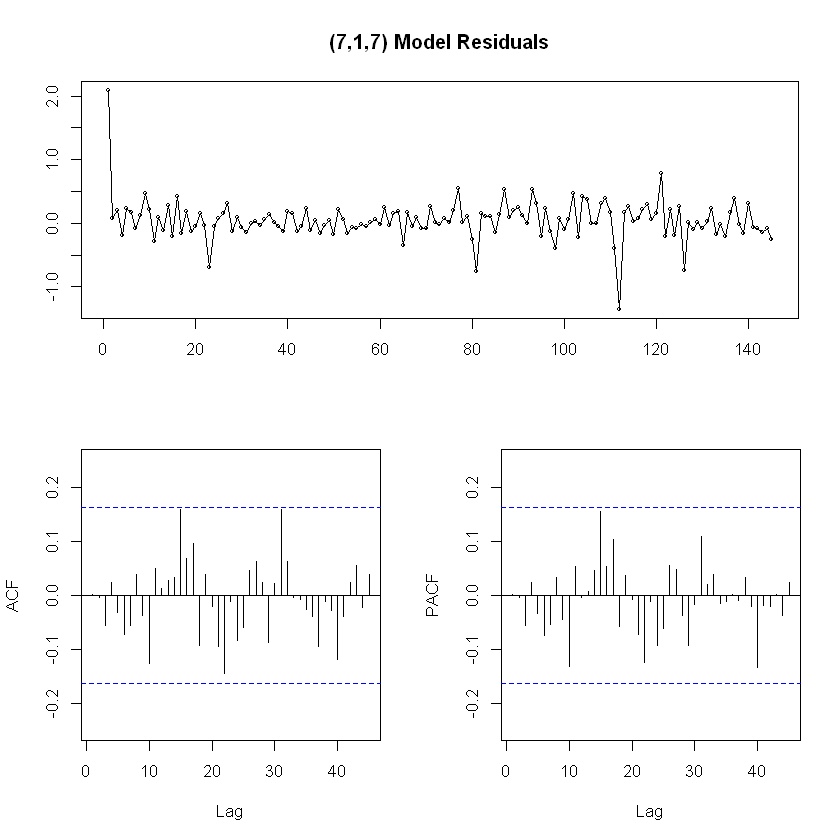

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146       2313.770 2313.437 2314.102 2313.261 2314.279
147       2314.472 2313.657 2315.287 2313.225 2315.719
148       2314.972 2313.566 2316.378 2312.822 2317.122
149       2315.411 2313.278 2317.544 2312.149 2318.673
150       2315.806 2312.786 2318.826 2311.187 2320.424
151       2316.170 2312.101 2320.239 2309.948 2322.393
152       2316.733 2311.415 2322.051 2308.599 2324.866
153       2317.141 2310.584 2323.698 2307.113 2327.169
154       2317.493 2309.688 2325.298 2305.556 2329.430
155       2317.845 2308.730 2326.960 2303.905 2331.785
156       2318.217 2307.726 2328.707 2302.173 2334.261
157       2318.562 2306.657 2330.466 2300.355 2336.768
158       2318.932 2305.577 2332.287 2298.507 2339.356
159       2319.225 2304.416 2334.033 2296.577 2341.872
160       2319.524 2303.238 2335.811 2294.616 2344.432
161       2319.821 2302.030 2337.612 2292.612 2347.030
162       2320.116 2300.801 2339.432 2290.576 2349.656
163       

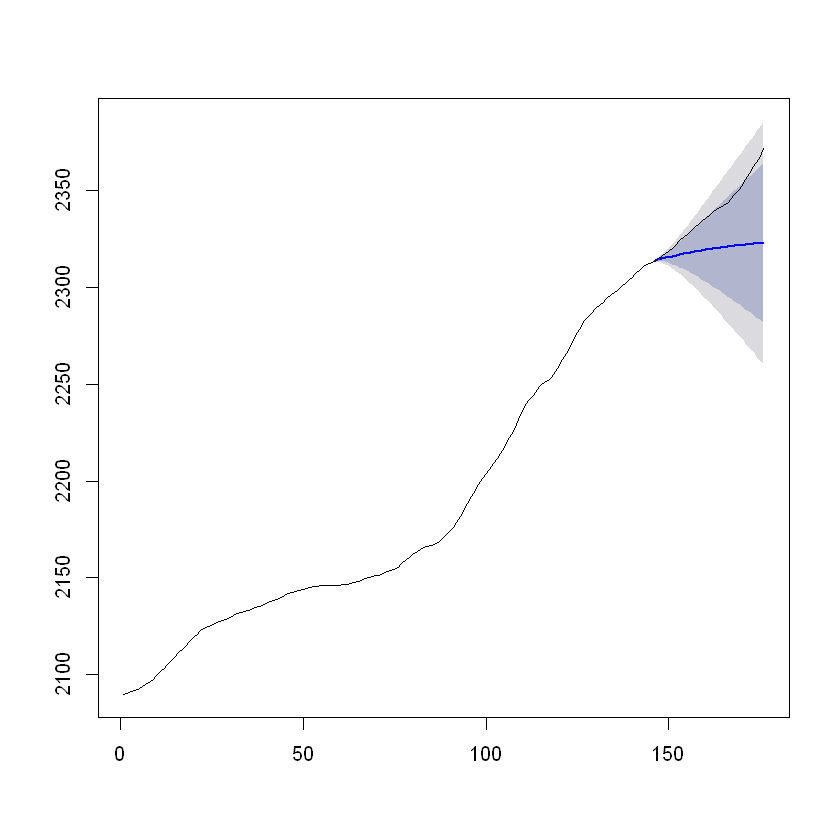

In [26]:
fitpq7.subscribers = arima(subscribers_ma[-c(146:176)], order=c(7,1,7), optim.control = list(maxit = 1000), method="ML")
print(fitpq7.subscribers)
tsdisplay(residuals(fitpq7.subscribers), lag.max=45, main='(7,1,7) Model Residuals')
fcpq7.val.subscribers = forecast(fitpq7.subscribers,h=31)
plot(fcpq7.val.subscribers, main=" ")
lines(subscribers_ma)
print(fcpq7.val.subscribers)


In [27]:
acc.val.subscribers = accuracy(fc.val.subscribers, chid.df$subscriber[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.subscribers)

                      ME     RMSE       MAE           MPE       MAPE      MASE
Training set -0.01071547 0.436535 0.2930858 -0.0004743899 0.01341557 0.1888942
Test set      5.37167698 8.568820 6.7643633  0.2285245819 0.28870761 4.3596408
                   ACF1
Training set -0.1535967
Test set             NA


In [28]:
acc.val.subscribers = accuracy(fcp7.val.subscribers, chid.df$subscriber[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.subscribers)

                       ME      RMSE       MAE          MPE       MAPE      MASE
Training set -0.008445506 0.3842459 0.2451438 -0.000360114 0.01124979 0.1579955
Test set      2.134958555 4.8554754 3.7459378  0.090407489 0.15999060 2.4142617
                   ACF1
Training set -0.1471022
Test set             NA


In [29]:
acc.val.subscribers = accuracy(fcq7.val.subscribers, chid.df$subscriber[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.subscribers)

                       ME      RMSE       MAE          MPE        MAPE
Training set -0.007027212 0.3621473 0.2123077 -0.000309512 0.009751536
Test set     -0.017050772 2.9983903 2.2183244 -0.001440661 0.094974026
                  MASE       ACF1
Training set 0.1368326 -0.1516028
Test set     1.4297129         NA


In [30]:
acc.val.subscribers = accuracy(fcpq7.val.subscribers, chid.df$subscriber[146:176], test=NULL, d=NULL, D=NULL)
print(acc.val.subscribers)

                     ME       RMSE        MAE        MPE        MAPE     MASE
Training set  0.0460134  0.3099543  0.1944216 0.00215384 0.008918826 0.125305
Test set     13.2555992 17.8865332 14.0512875 0.56507547 0.599475204 9.056073
                    ACF1
Training set 0.001854345
Test set              NA


ARIMA(0,2,7) gave the least value of RMSE and MASE values. Also, in the ACF and PACF plots of it's residuals, there were no significant spikes. 
We will use this model to forecast our subscribers for next 3 months.


Call:
arima(x = chid.df$subscriber, order = c(0, 2, 7), method = "ML")

Coefficients:
          ma1      ma2     ma3     ma4      ma5     ma6      ma7
      -0.8510  -0.2332  0.1922  0.1349  -0.1370  0.1116  -0.1204
s.e.   0.0767   0.0964  0.1132  0.1044   0.1324  0.1000   0.0957

sigma^2 estimated as 3.663:  log likelihood = -373.22,  aic = 762.43
Time Series:
Start = 183 
End = 273 
Frequency = 1 
 [1] 2389 2390 2394 2397 2401 2404 2407 2410 2413 2416 2419 2422 2425 2428 2431
[16] 2434 2437 2440 2443 2446 2449 2452 2455 2458 2461 2464 2467 2470 2473 2475
[31] 2478 2481 2484 2487 2490 2493 2496 2499 2502 2505 2508 2511 2514 2517 2520
[46] 2523 2526 2529 2532 2535 2538 2541 2544 2547 2550 2553 2556 2558 2561 2564
[61] 2567 2570 2573 2576 2579 2582 2585 2588 2591 2594 2597 2600 2603 2606 2609
[76] 2612 2615 2618 2621 2624 2627 2630 2633 2636 2639 2641 2644 2647 2650 2653
[91] 2656


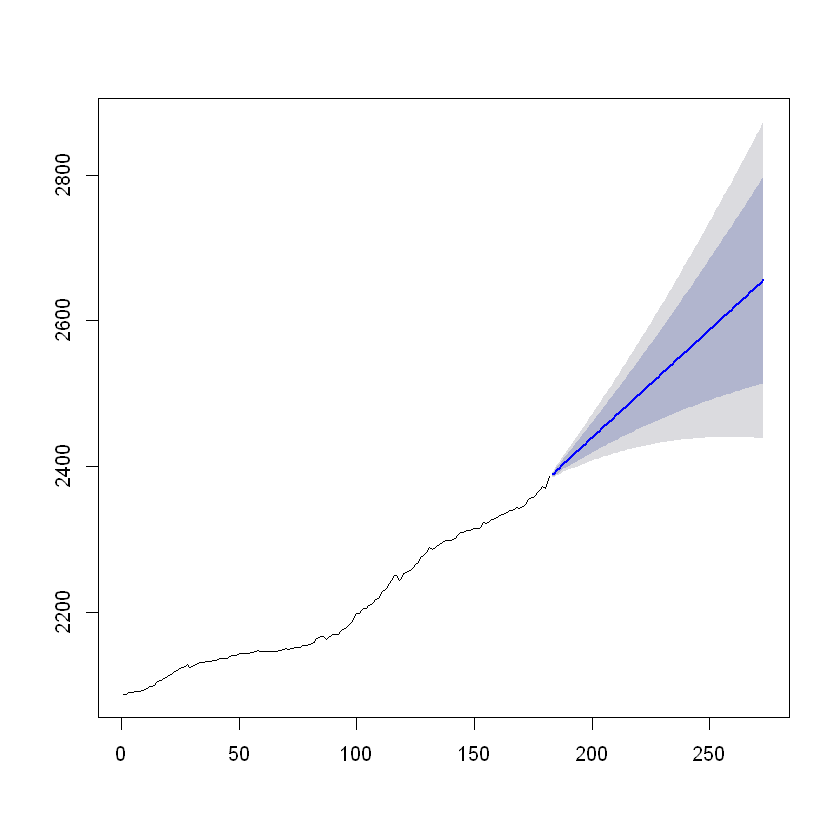

In [31]:
fitq7.subscribers.final = arima(chid.df$subscriber, order=c(0,2,7), method="ML")
print(fitq7.subscribers.final)
fcq7.subscribers.final = forecast(fitq7.subscribers.final,h=91)
plot(fcq7.subscribers.final, main=" ")
lines(chid.df$subscribers)
pred.subscribers = round(fcq7.subscribers.final$mean)
print(pred.subscribers)

# VideosCount

Series: videoscount_ma[-c(146:176)] 
ARIMA(1,1,0)                    

Coefficients:
         ar1
      0.8514
s.e.  0.0420

sigma^2 estimated as 0.0002652:  log likelihood=388.49
AIC=-772.97   AICc=-772.89   BIC=-767.03


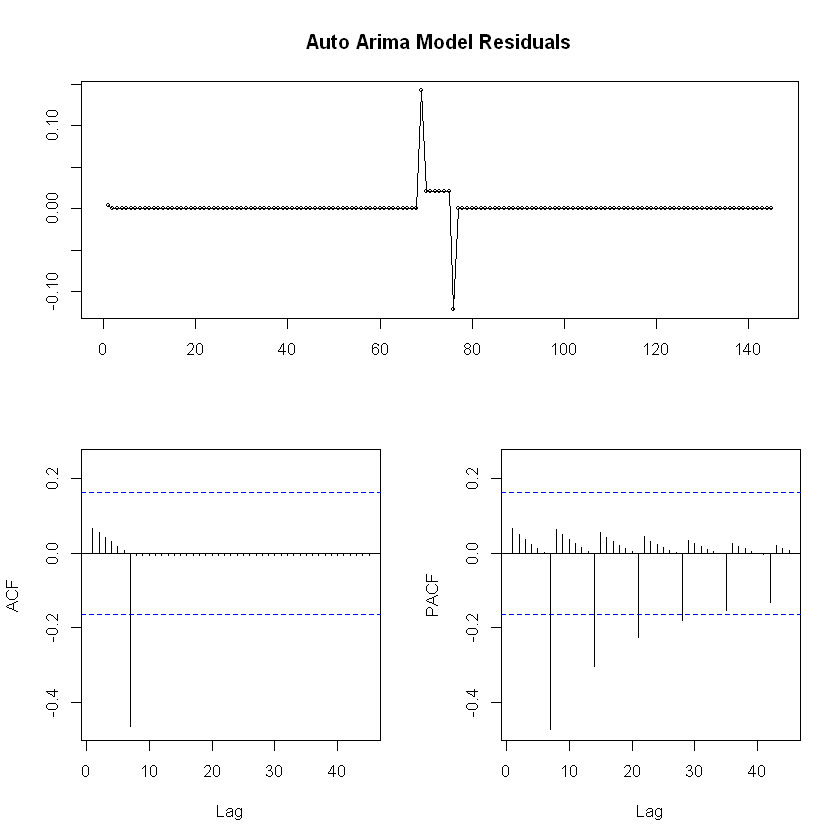

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146              5 4.979131 5.020869 4.968083 5.031917
147              5 4.956086 5.043914 4.932839 5.067161
148              5 4.930577 5.069423 4.893827 5.106173
149              5 4.903762 5.096238 4.852817 5.147183
150              5 4.876362 5.123638 4.810912 5.189088
151              5 4.848845 5.151155 4.768828 5.231172
152              5 4.821519 5.178481 4.727037 5.272963
153              5 4.794588 5.205412 4.685849 5.314151
154              5 4.768185 5.231815 4.645469 5.354531
155              5 4.742393 5.257607 4.606025 5.393975
156              5 4.717262 5.282738 4.567590 5.432410
157              5 4.692816 5.307184 4.530203 5.469797
158              5 4.669062 5.330938 4.493873 5.506127
159              5 4.645994 5.354006 4.458594 5.541406
160              5 4.623599 5.376401 4.424345 5.575655
161              5 4.601859 5.398141 4.391096 5.608904
162              5 4.580750 5.419250 4.358812 5.641188
163       

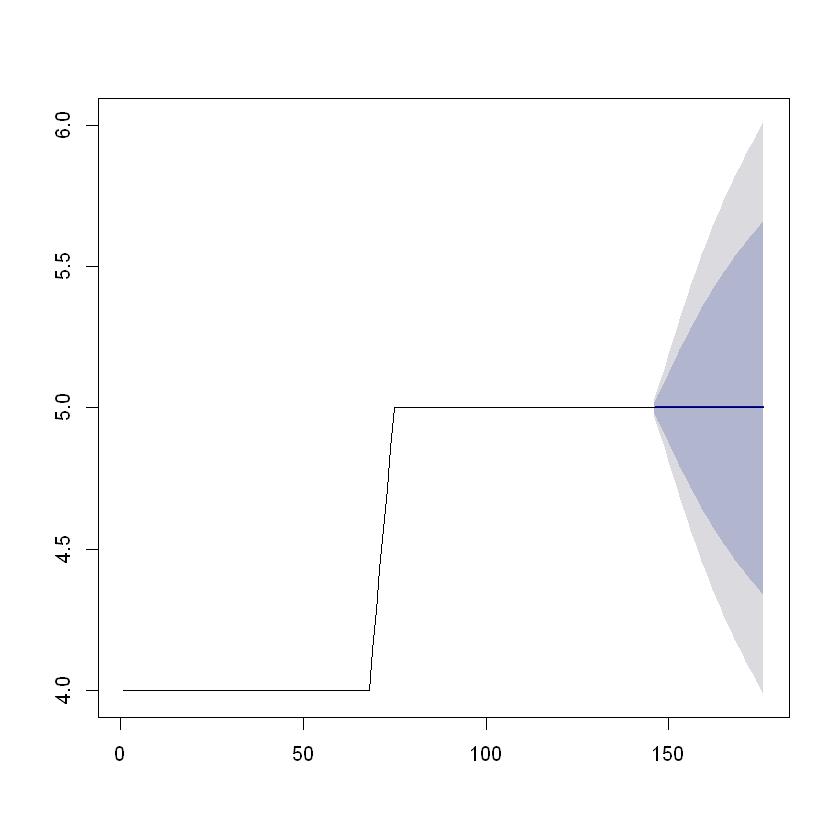

In [32]:
auto.fit.videoscounts = auto.arima(videoscount_ma[-c(146:176)], seasonal = TRUE)
print(auto.fit.videoscounts)
tsdisplay(residuals(auto.fit.videoscounts), lag.max=45, main='Auto Arima Model Residuals')
fc.val.videoscounts = forecast(auto.fit.videoscounts,h=31)
plot(fc.val.videoscounts, main=" ")
lines(videoscount_ma)
print(fc.val.videoscounts)


Call:
arima(x = videoscount_ma[-c(146:176)], order = c(8, 1, 0), method = "ML")

Coefficients:
         ar1     ar2     ar3      ar4     ar5     ar6      ar7     ar8
      0.9223  0.0000  0.0000  -0.0001  0.0000  0.0001  -0.4773  0.4064
s.e.  0.0744  0.0985  0.0982   0.0966  0.0976  0.0973   0.0966  0.0726

sigma^2 estimated as 0.0002026:  log likelihood = 406.46,  aic = -794.92


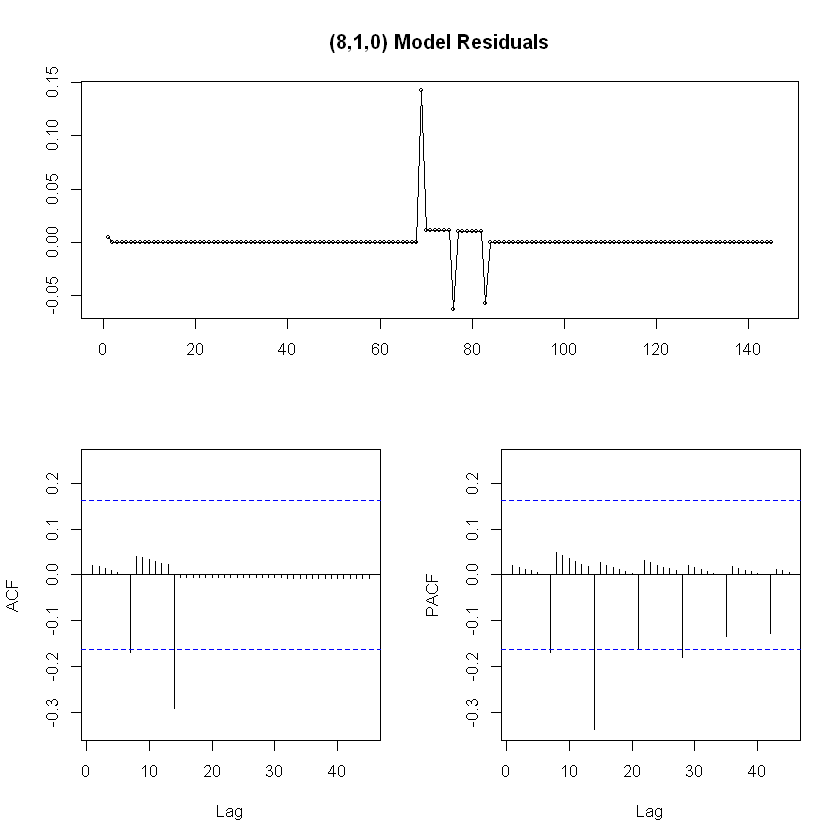

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146              5 4.981759 5.018241 4.972102 5.027898
147              5 4.960473 5.039527 4.939549 5.060451
148              5 4.935805 5.064195 4.901823 5.098177
149              5 4.908719 5.091281 4.860398 5.139602
150              5 4.879873 5.120127 4.816281 5.183719
151              5 4.849739 5.150261 4.770195 5.229805
152              5 4.818673 5.181327 4.722684 5.277316
153              5 4.791390 5.208610 4.680958 5.319042
154              5 4.766880 5.233120 4.643474 5.356526
155              5 4.744604 5.255396 4.609406 5.390594
156              5 4.724225 5.275775 4.578239 5.421761
157              5 4.705512 5.294488 4.549619 5.450381
158              5 4.688289 5.311711 4.523279 5.476721
159              5 4.672419 5.327581 4.499008 5.500992
160              5 4.656558 5.343442 4.474751 5.525249
161              5 4.640675 5.359325 4.450460 5.549540
162              5 4.624742 5.375258 4.426092 5.573908
163       

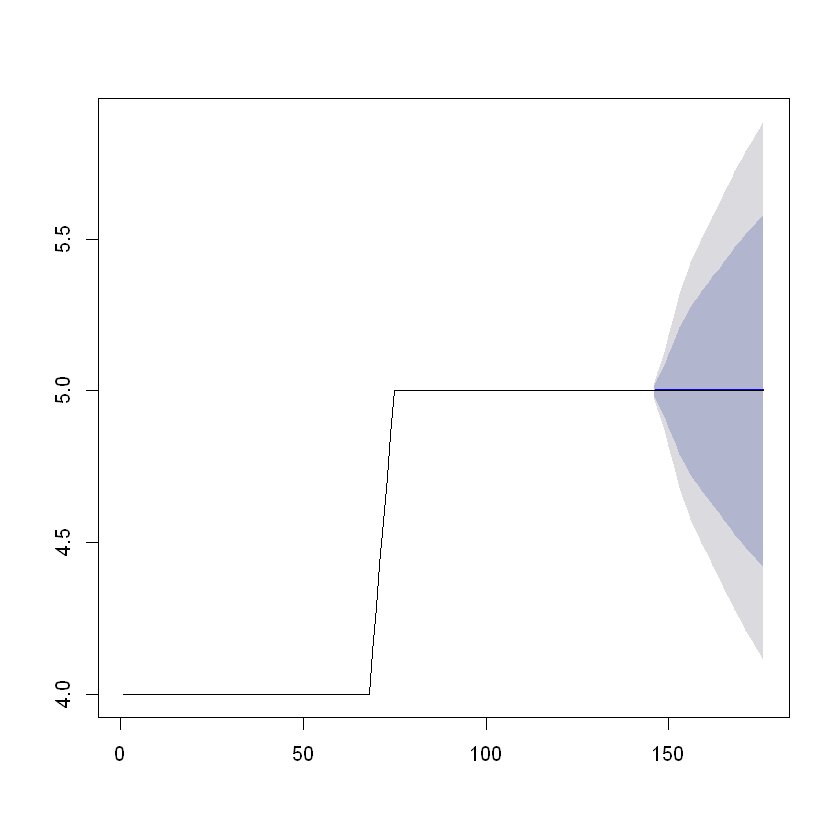

In [33]:
fitp7.videoscounts = arima(videoscount_ma[-c(146:176)], order=c(8,1,0), method="ML")
print(fitp7.videoscounts)
tsdisplay(residuals(fitp7.videoscounts), lag.max=45, main='(8,1,0) Model Residuals')
fcp7.val.videoscounts = forecast(fitp7.videoscounts,h=31)
plot(fcp7.val.videoscounts, main=" ")
lines(videoscount_ma)
print(fcp7.val.videoscounts)


Call:
arima(x = videoscount_ma[-c(146:176)], order = c(0, 1, 8), method = "ML")

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6     ma7     ma8
      1.0002  1.0005  1.0005  1.0005  1.0005  1.0005  0.0005  0.0003
s.e.  0.0904  0.1227  0.1220  0.1269  0.1325  0.1341  0.1218  0.0865

sigma^2 estimated as 0.000136:  log likelihood = 426.53,  aic = -835.07


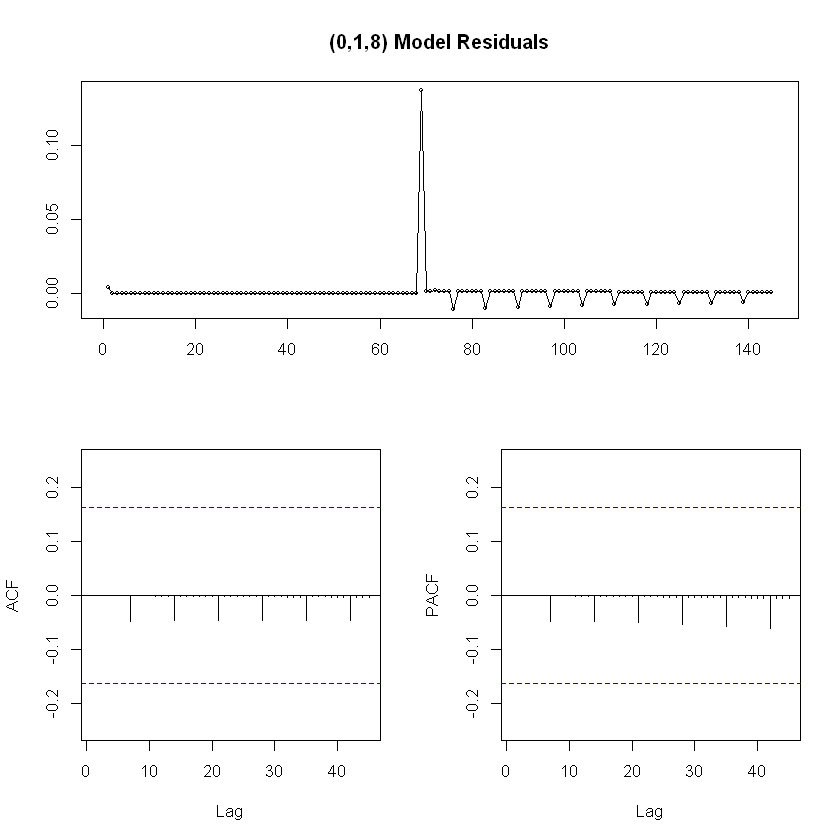

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
146       5.005812 4.990568 5.021056 4.982499 5.029126
147       5.010633 4.976635 5.044632 4.958637 5.062630
148       5.014463 4.957714 5.071212 4.927673 5.101254
149       5.017303 4.934438 5.100167 4.890573 5.144032
150       5.019196 4.907273 5.131119 4.848024 5.190367
151       5.020143 4.876530 5.163755 4.800506 5.239780
152       5.020143 4.842449 5.197837 4.748384 5.291903
153       5.020144 4.813922 5.226365 4.704755 5.335532
154       5.020144 4.788885 5.251402 4.666464 5.373823
155       5.020144 4.766306 5.273981 4.631932 5.408355
156       5.020144 4.745577 5.294710 4.600230 5.440057
157       5.020144 4.726307 5.313980 4.570759 5.469528
158       5.020144 4.708225 5.332062 4.543106 5.497182
159       5.020144 4.691136 5.349152 4.516970 5.523318
160       5.020144 4.674891 5.365396 4.492125 5.548162
161       5.020144 4.659377 5.380910 4.468399 5.571888
162       5.020144 4.644503 5.395784 4.445651 5.594636
163       

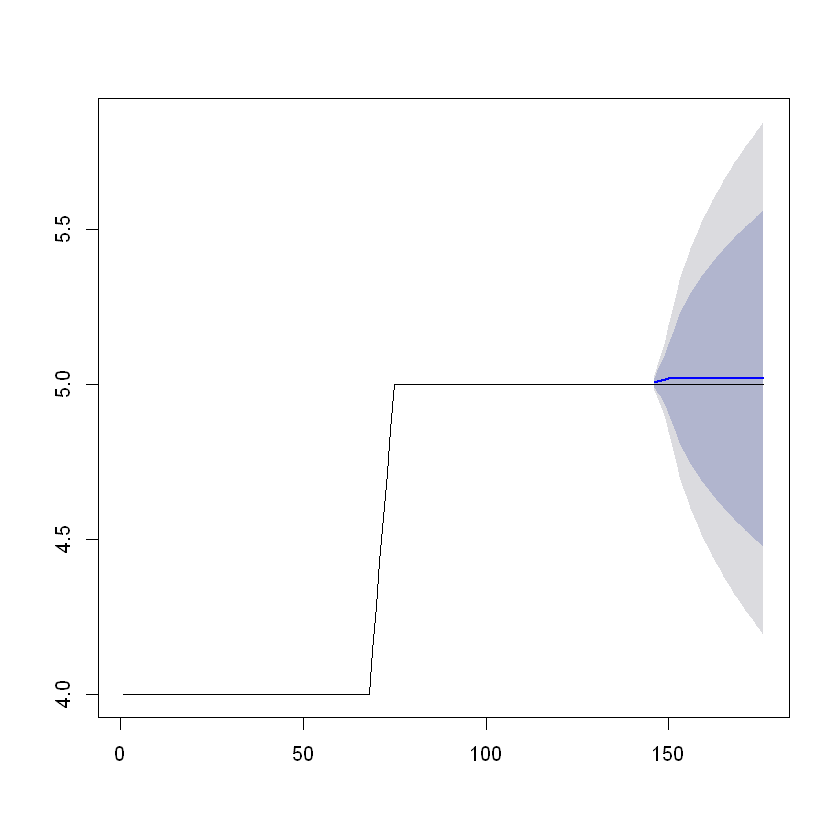

In [34]:
fitq7.videoscounts = arima(videoscount_ma[-c(146:176)], order=c(0,1,8), method="ML")
print(fitq7.videoscounts)
tsdisplay(residuals(fitq7.videoscounts), lag.max=45, main='(0,1,8) Model Residuals')
fcq7.val.videoscounts = forecast(fitq7.videoscounts,h=31)
plot(fcq7.val.videoscounts, main=" ")
lines(videoscount_ma)
print(fcq7.val.videoscounts)                                                           

Warning message in log(s2):
"NaNs produced"


Call:
arima(x = videoscount_ma[-c(146:176)], order = c(7, 1, 7), method = "ML")

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"

        ar1     ar2     ar3     ar4     ar5     ar6      ar7     ma1     ma2
      0.371  0.0002  0.0002  0.0006  0.0005  0.0005  -0.0039  0.6293  0.6294
s.e.    NaN  0.0919  0.0919  0.0930  0.0878  0.0860      NaN     NaN     NaN
         ma3     ma4     ma5    ma6      ma7
      0.6294  0.6293  0.6292  0.629  -0.3709
s.e.     NaN     NaN     NaN    NaN      NaN

sigma^2 estimated as 0.0001359:  log likelihood = 426.54,  aic = -823.07


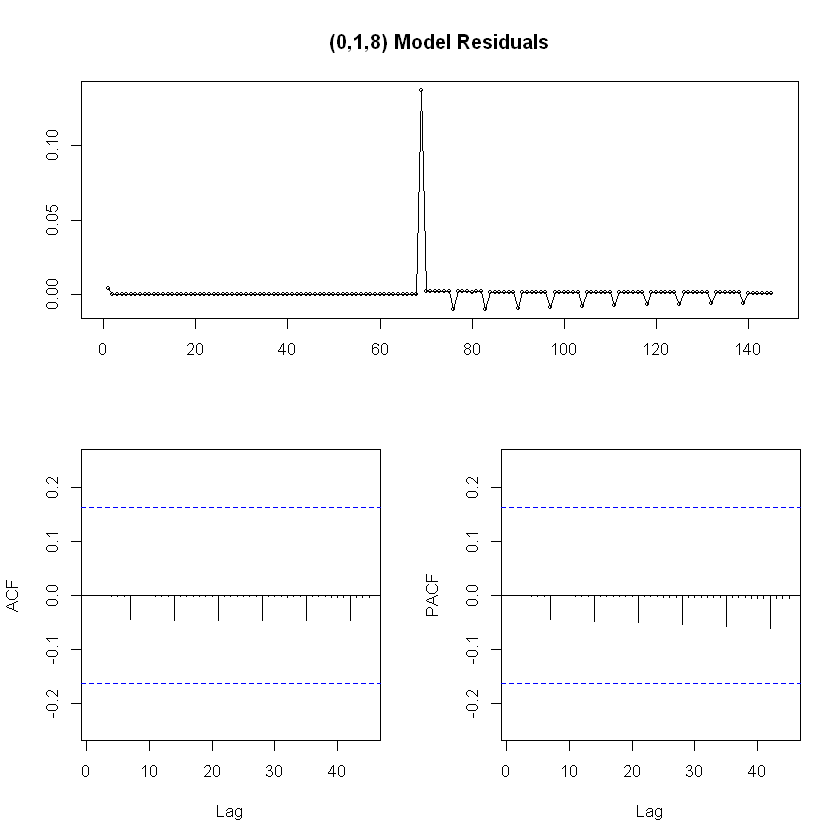


Call:
arima(x = videoscount_ma[-c(146:176)], order = c(7, 1, 7), method = "ML")

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"NaNs produced"

        ar1     ar2     ar3     ar4     ar5     ar6      ar7     ma1     ma2
      0.371  0.0002  0.0002  0.0006  0.0005  0.0005  -0.0039  0.6293  0.6294
s.e.    NaN  0.0919  0.0919  0.0930  0.0878  0.0860      NaN     NaN     NaN
         ma3     ma4     ma5    ma6      ma7
      0.6294  0.6293  0.6292  0.629  -0.3709
s.e.     NaN     NaN     NaN    NaN      NaN

sigma^2 estimated as 0.0001359:  log likelihood = 426.54,  aic = -823.07


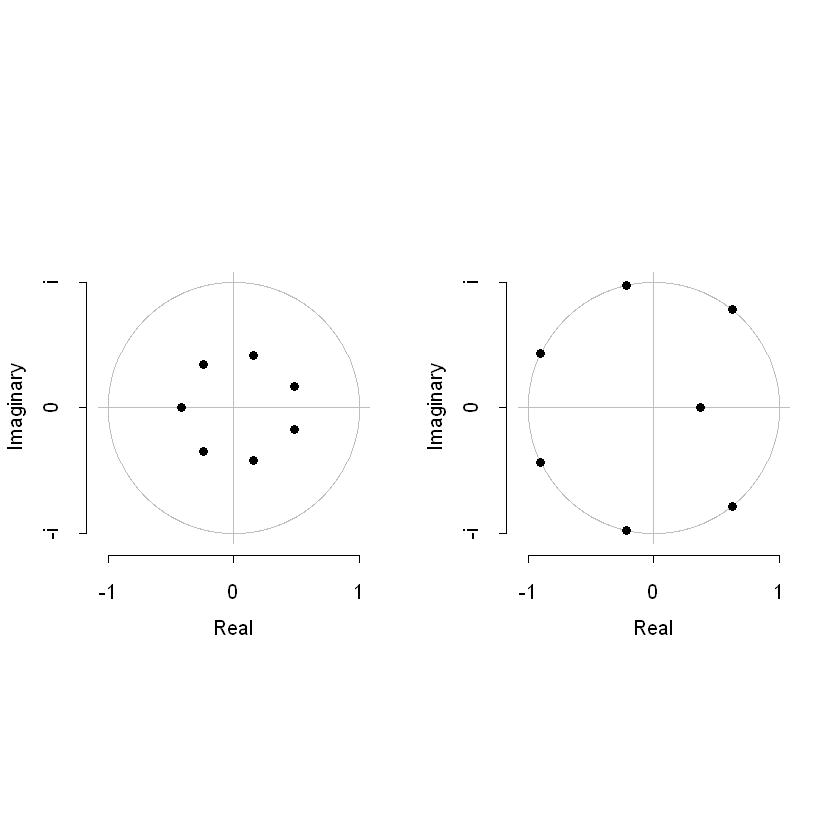

In [35]:
fitpq7.videoscounts = arima(videoscount_ma[-c(146:176)], order=c(7,1,7), method="ML")
print(fitpq7.videoscounts)
tsdisplay(residuals(fitpq7.videoscounts), lag.max=45, main='(0,1,8) Model Residuals')
fcq7.val.videoscounts = forecast(fitpq7.videoscounts,h=31)
plot(fitpq7.videoscounts, main=" ")
lines(videoscount_ma)
print(fitpq7.videoscounts)   


Call:
arima(x = chid.df$videoscount, order = c(0, 1, 8), method = "ML")

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6     ma7     ma8
      0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
s.e.  0.0741  0.0739  0.0737  0.0735  0.0733  0.0731  0.0729  0.0727

sigma^2 estimated as 0.005525:  log likelihood = 213.64,  aic = -409.27
Time Series:
Start = 183 
End = 273 
Frequency = 1 
 [1] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[39] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[77] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5


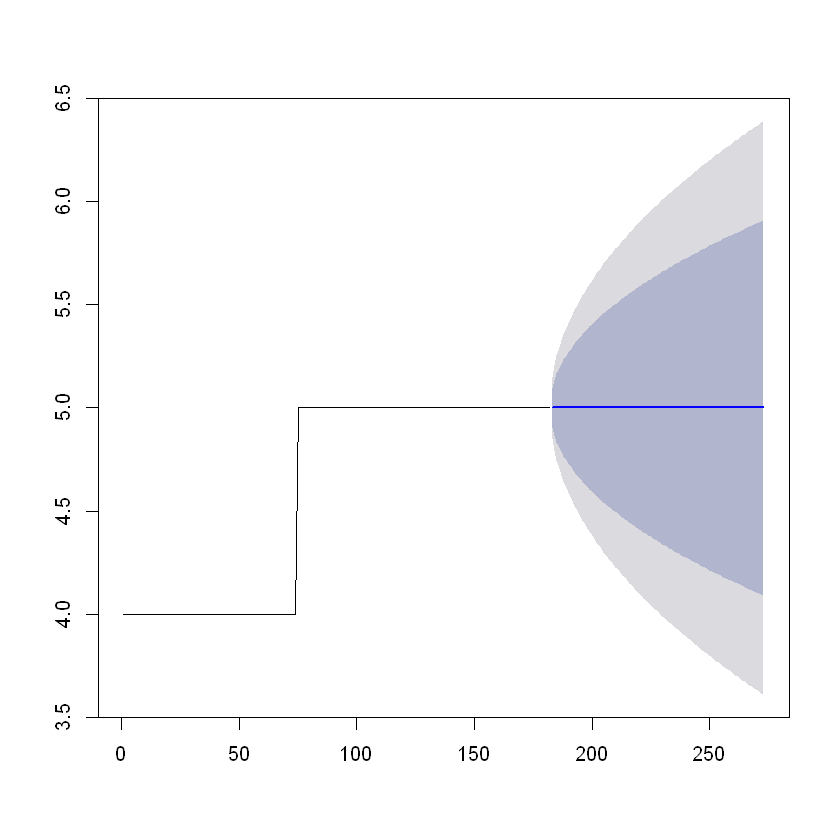

In [36]:
fitq7.videoscount.final = arima(chid.df$videoscount, order=c(0,1,8), method="ML")
print(fitq7.videoscount.final)
fcq7.videoscounts.final = forecast(fitq7.videoscount.final,h=91)
plot(fcq7.videoscounts.final, main=" ")
lines(chid.df$videoscount)
pred.videoscount=fcq7.videoscounts.final$mean
print(pred.videoscount)

In [37]:
channel.name = c(replicate(91,'UC6ROKPXrnzfhNYST1w'))
views = c(pred.views)
subscriber = c(pred.subscribers)
videoscount = c(pred.videoscount)
date = seq(from = as.Date("01-04-2017", "%d-%m-%Y"), to = as.Date("30-06-2017", "%d-%m-%Y"), by = 1)
date = strftime(date,"%d-%m-%Y")
#print(date)
submit = data.frame(channel.name, views, subscriber, videoscount, date)
head(submit)

channel.name,views,subscriber,videoscount,date
UC6ROKPXrnzfhNYST1w,3882859,2389,5,01-04-2017
UC6ROKPXrnzfhNYST1w,3884238,2390,5,02-04-2017
UC6ROKPXrnzfhNYST1w,3888715,2394,5,03-04-2017
UC6ROKPXrnzfhNYST1w,3892151,2397,5,04-04-2017
UC6ROKPXrnzfhNYST1w,3895273,2401,5,05-04-2017
UC6ROKPXrnzfhNYST1w,3899378,2404,5,06-04-2017


In [38]:
write.csv(submit, file = "RishiSubmission.csv", ,row.names=FALSE)